## REMap-SOLAR Pyranometer Data Analysis
### About
This Notebook is used for the Analysis of the Solar Radiation Readings of Pyranometers installed by REMap-SOLAR.

### RUNNING THE TOOL
_**REQUIREMENTS**_
* Python 2.7
* jupyter
* pandas
* numpy
* matplotlib

They are also found in the __requirements.txt__ file.  
You can install these requirements using __pip__ (__sudo pip install -r requirements.txt__ _or_ __pip install -r requirements.txt__)  

_**PROCEDURE**_
1. Enter the input parameters in the cell marked as "_INPUT PARAMETERS_".
2. Run all cells above __SENSOR READING STATS__ (__Cell -> Run All Above__)
3. Go to the cell with the code you want to run (i.e SENSOR READING STATS, MONTHLY STATS, etc)
4. In the Toolbar above: __Cell -> Run Cells__

### LICENSE  
The "REMap-Solar Pyranometer Data Analysis Tool" is provided under the GNU General Public License (GNU-GPL) v3.0

_Copyright (C) 2016 Ben Hur S. Pintor (bhs.pintor@gmail.com)_

This program is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version.

This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the GNU General Public License for more details.

You should have received a copy of the GNU General Public License along with this program.  If not, see <http://www.gnu.org/licenses/>.

In [51]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib

__author__ = "Ben Hur S. Pintor"
__contact__ = "bhs.pintor@gmail.com"
__version__ = "0.0.1"

### INPUT PARAMETERS

In [52]:
'''Input file and SUC'''
infile = "REMap Pyranometer Readings/REMapSolarLogger_ISU09062016.csv"  # path to input file
suc = "ISU"  # Will be used in naming the image plots

#infile = "REMap Pyranometer Readings/REMapSolarLogger_UPMin10032016.csv"
#suc = "UPMin"

'''Directory to save image plots'''
img_savedir = "/home/anon/Pyra Plots"

'''Column headers of sensor data'''
solar_names = ['reading_count', 'reading_time', 'reading']
#solar_names = ['reading_count', 'reading_time', 'wind_spd1', 'gust_spd1', 'wind_spd2', 'gust_spd2', 'wind_dir', 'reading']

'''Recording interval of sensor'''
time_step = 15.0

'''Minimum # of days logging'''
n = 1

### MAIN CODE

In [53]:
'''Read the input file into a pandas dataframe'''
df = pd.read_csv(infile, 
                 skiprows=1, 
                 parse_dates=[1,], 
                 infer_datetime_format=True, 
                 header=0, 
                 names=solar_names)

df.drop('reading_count', axis=1, inplace=True)    # remove the first column (reading_count)

'''Uncomment the lines below for pyranometers installed with REMap-WIND sensors'''
"""
df.drop('wind_spd1', axis=1, inplace=True)
df.drop('gust_spd1', axis=1, inplace=True)
df.drop('wind_spd2', axis=1, inplace=True)
df.drop('gust_spd2', axis=1, inplace=True)
df.drop('wind_dir', axis=1, inplace=True)
"""

ts = df.set_index('reading_time')    # set the dataframe into a time series with the index being the reading time

daily_averages = ts.resample('D').sum()/(60.0/time_step)  # daily averages, for USC change 4 to 60

all_readings_day = ts.groupby(pd.TimeGrouper(freq='D'))    # all readings grouped by day

all_readings_month = ts.groupby(pd.TimeGrouper(freq='M'))   # all readings grouped by month

daily_averages_month = daily_averages.groupby(pd.TimeGrouper(freq='M'))    # daily averages grouped by month

In [54]:
"""
30 days = 2880 count (APR, JUN, SEP, NOV)
31 days = 2976 count (JAN, MAR, MAY, JUL, AUG, OCT, DEC)
28 days = 2668 count (FEB)
29 days = 2784 count (FEB [leap])
""" 

'''Stats'''
num_readings = all_readings_month.count()    # number of readings for the month
d_logging = daily_averages_month.count()     # number of days logging data
r_max = all_readings_month.max()             # maximum sensor reading for the month
r_max_when = all_readings_month.idxmax()     # time of max sensor reading

m_min = daily_averages_month.min()           # minimum daily average for the month
m_min_when = daily_averages_month.idxmin()   # day of minimum daily average
m_max = daily_averages_month.max()           # maximum daily average for the month
m_max_when = daily_averages_month.idxmax()   # day of maximum daily average
m_mean = daily_averages_month.mean()         # mean monthly value


'''Rename the columns'''
num_readings.rename(columns={'reading':'num_readings'}, inplace=True)
d_logging.rename(columns={'reading':'days_logging'}, inplace=True)
r_max.rename(columns={'reading':'max_reading'}, inplace=True)
r_max_when.rename(columns={'reading':'max_reading_time'}, inplace=True)

m_min.rename(columns={'reading':'min'}, inplace=True)
m_min_when.rename(columns={'reading':'min_day'}, inplace=True)
m_max.rename(columns={'reading':'max'}, inplace=True)
m_max_when.rename(columns={'reading':'max_day'}, inplace=True)
m_mean.rename(columns={'reading':'mean'}, inplace=True)


### SENSOR READINGS STATS

In [55]:
print("Sensor Reading Stats for:\n{}".format(infile))

'''Merge the columns'''
reading_stats = pd.concat([d_logging, num_readings, r_max, r_max_when],
                          axis=1,
                          join_axes=[d_logging.index])

'''Drop the months with less than n days of logging'''
reading_stats.drop(reading_stats[reading_stats.days_logging<n].index, inplace=True)

reading_stats

Sensor Reading Stats for:
REMap Pyranometer Readings/REMapSolarLogger_ISU09062016.csv


days_logging  num_readings  max_reading    max_reading_time
reading_time                                                             
2016-04-30              19          1783       1250.6 2016-04-21 12:00:09
2016-05-31              31          2976       1216.9 2016-05-15 11:15:09
2016-06-30              30          2880       1276.9 2016-06-29 11:45:09
2016-07-31              31          2976       1276.9 2016-07-25 12:15:09
2016-08-31              31          2976       1276.9 2016-08-29 12:15:09
2016-09-30               6           551       1153.1 2016-09-01 12:45:09

### MONTHLY STATS

In [56]:
print("Monthly Stats for:\n{}".format(infile))

'''Merge the columns'''
monthly_stats = pd.concat([d_logging, m_min, m_min_when, m_max, m_max_when, m_mean],
                          axis=1,
                          join_axes=[d_logging.index])

'''Drop the months with less than n days of logging'''
monthly_stats.drop(monthly_stats[monthly_stats.days_logging<n].index, inplace=True)

monthly_stats

Monthly Stats for:
REMap Pyranometer Readings/REMapSolarLogger_ISU09062016.csv


days_logging       min    min_day       max    max_day  \
reading_time                                                           
2016-04-30              19   677.375 2016-04-12  7314.750 2016-04-26   
2016-05-31              31  4254.500 2016-05-22  6921.375 2016-05-30   
2016-06-30              30  3835.875 2016-06-19  7018.125 2016-06-01   
2016-07-31              31   122.800 2016-07-31  7435.650 2016-07-21   
2016-08-31              31  2048.700 2016-08-16  6901.975 2016-08-11   
2016-09-30               6  3355.875 2016-09-04  6273.125 2016-09-03   

                     mean  
reading_time               
2016-04-30    6074.709211  
2016-05-31    6107.612097  
2016-06-30    6179.224167  
2016-07-31    5679.031452  
2016-08-31    5163.434677  
2016-09-30    5230.787500

### PLOTS

In [57]:
plt.style.use('ggplot')

### ALL READINGS PER MONTH

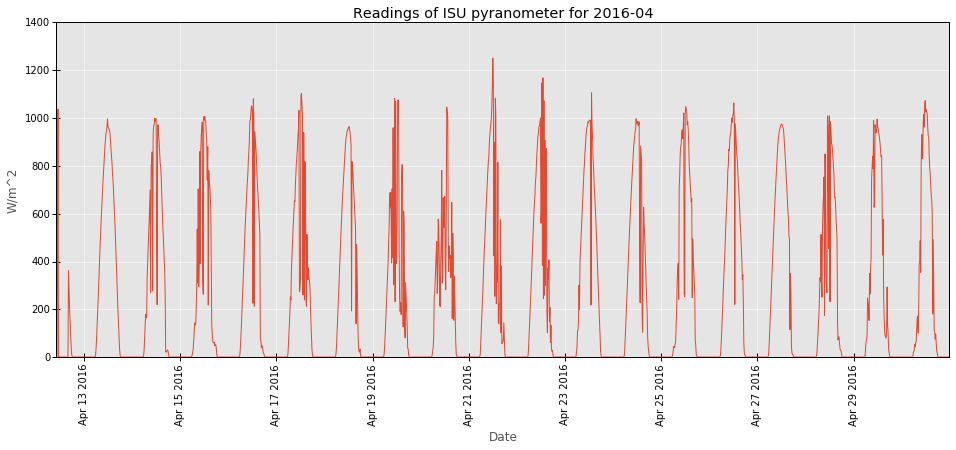

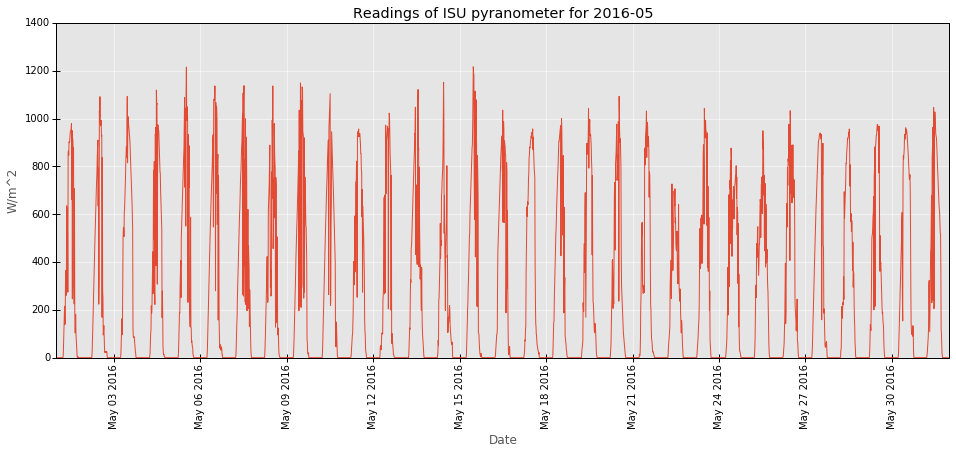

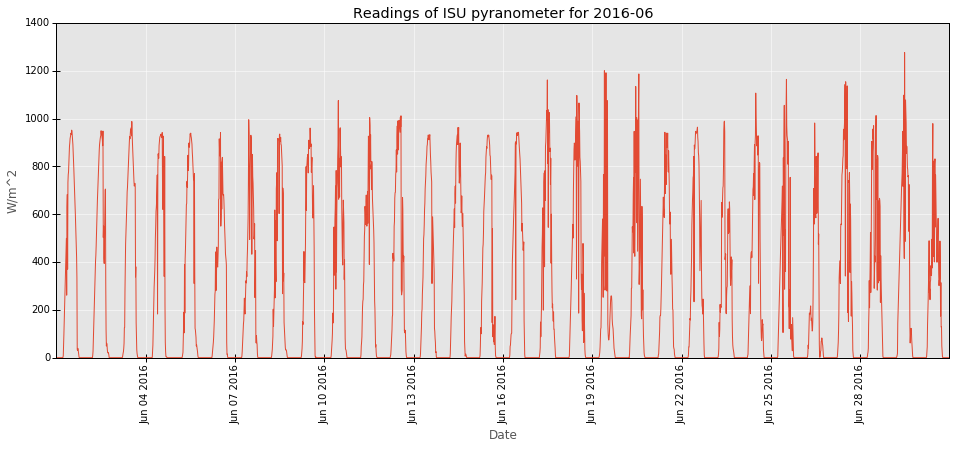

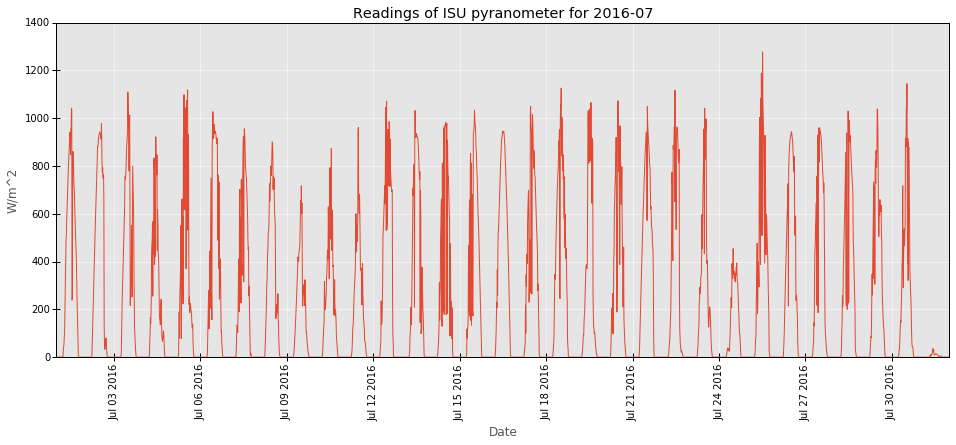

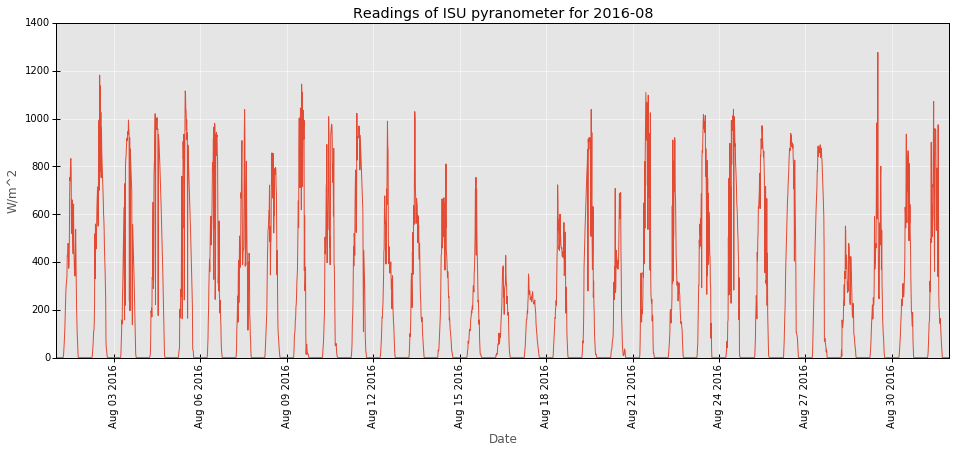

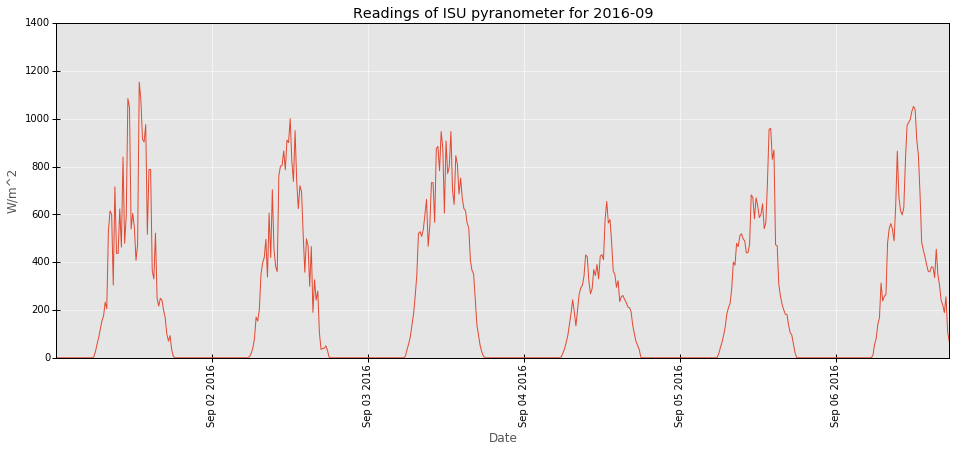

In [58]:
keys01 = all_readings_month.groups.keys();
keys01.sort()

for key in keys01:
    to_plot = all_readings_month.get_group(key)
    if to_plot.count().item() < 1:  #1440
        pass
    
    else:
        fig = plt.figure(figsize=(16,6))
        ax = fig.add_subplot(1,1,1)

        ax.spines['bottom'].set_color('black')
        ax.spines['top'].set_color('black') 
        ax.spines['right'].set_color('black')
        ax.spines['left'].set_color('black')

        ax.tick_params(direction='inout', length=8, width=1, colors='black', top=False, right=False)

        ax.set_title("Readings of {} pyranometer for {}".format(suc, str(key)[:-12]))

        ax.set_ylabel('W/m^2')
        ax.set_ylim(0,1400)
        ax.set_xlabel('Date')

        plt.xticks(rotation=90)
        #with plt.style.context('ggplot'):
        plt.plot(to_plot.index, to_plot, '-')
        plt.savefig("{}/{}_{}_all.png".format(img_savedir, suc, str(key)[:-12]), bbox_inches='tight')
        #plt.show()
        

### DAILY AVERAGE PER MONTH

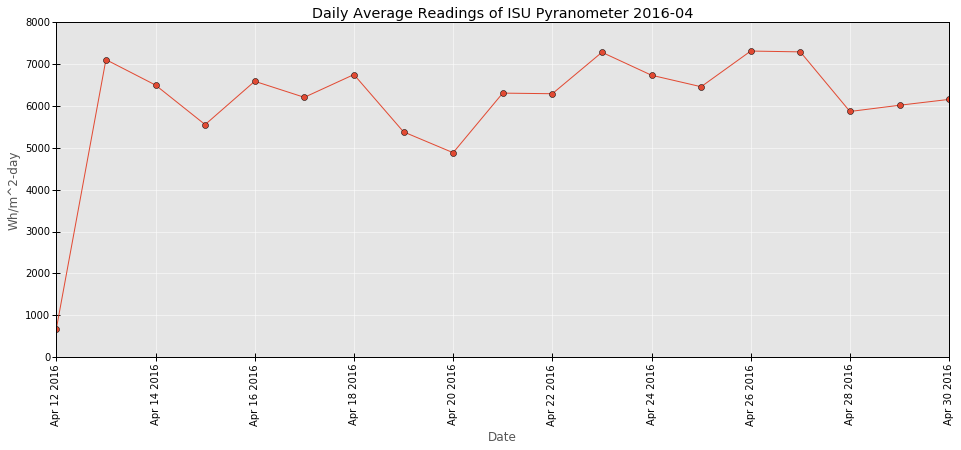

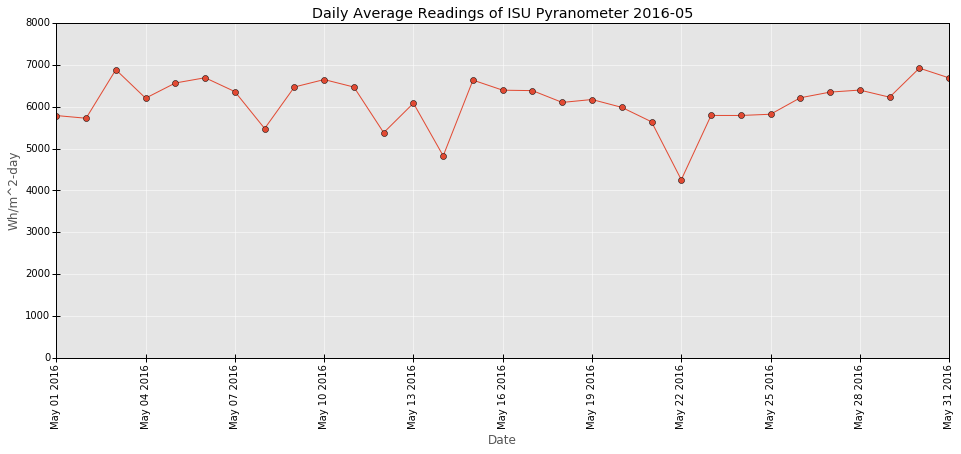

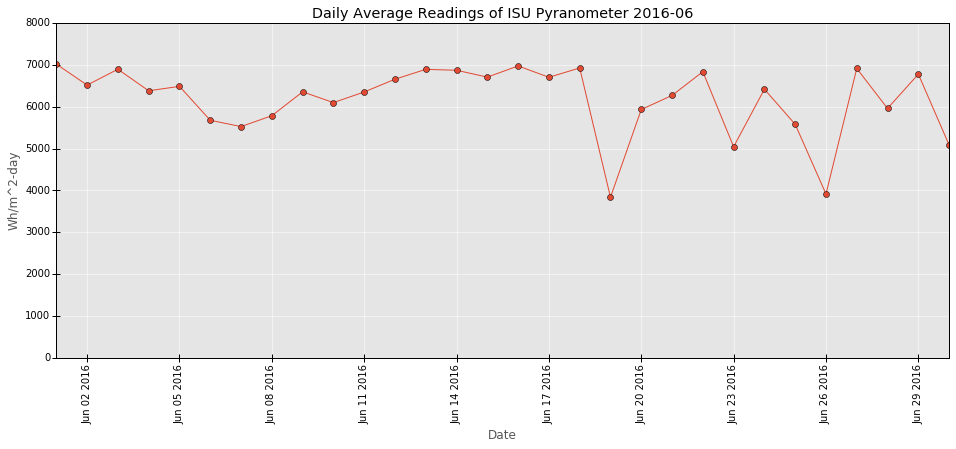

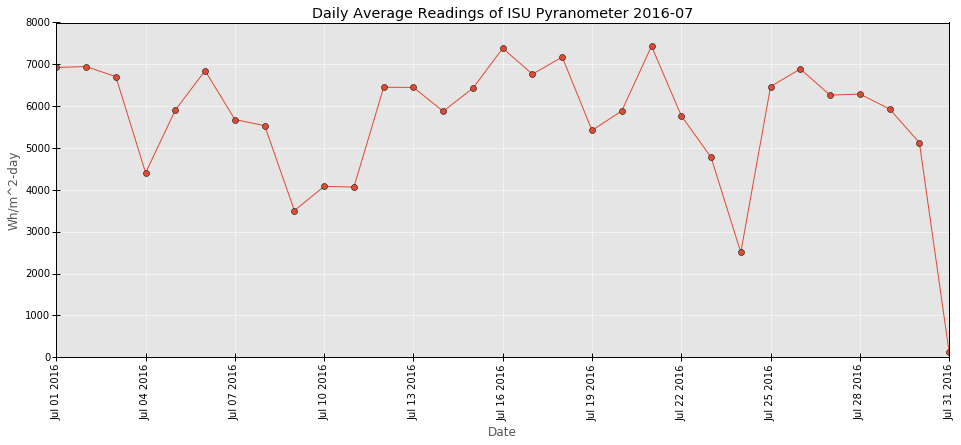

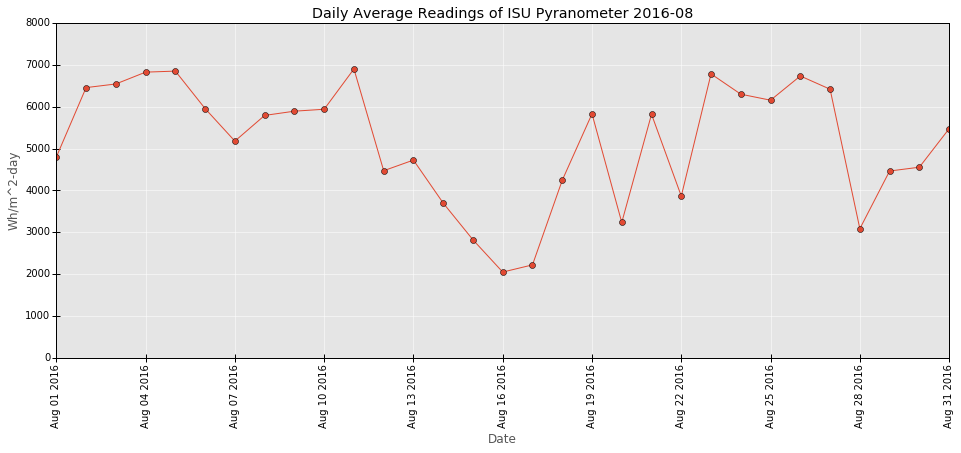

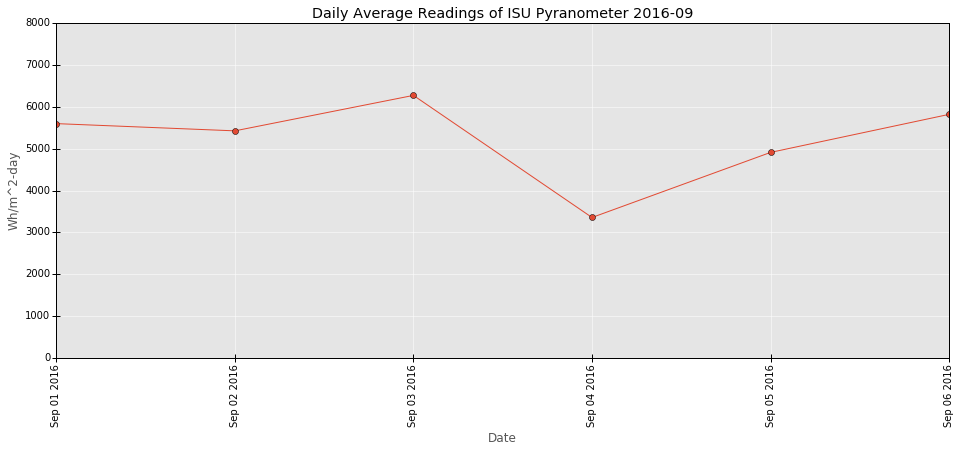

In [59]:
keys02 = all_readings_month.groups.keys();
keys02.sort()

for key in keys02:
    to_plot = daily_averages_month.get_group(key)
    if to_plot.count().item() < 1:
        pass
    
    else:
        fig = plt.figure(figsize=(16,6))
        ax = fig.add_subplot(1,1,1)

        ax.spines['bottom'].set_color('black')
        ax.spines['top'].set_color('black') 
        ax.spines['right'].set_color('black')
        ax.spines['left'].set_color('black')

        ax.tick_params(direction='inout', length=8, width=1, colors='black', top=False, right=False)

        ax.set_title("Daily Average Readings of {} Pyranometer {}".format(suc, str(key)[:-12]))

        ax.set_ylabel('Wh/m^2-day')
        ax.set_ylim(0,8000)
        ax.set_xlabel('Date')

        plt.xticks(rotation=90)
        #with plt.style.context('ggplot'):
        plt.plot(to_plot.index, to_plot, 'o-')
        plt.savefig("{}/{}_{}_daily.png".format(img_savedir, suc, str(key)[:-12]), bbox_inches='tight')
        #plt.show()
    


### DAILY READINGS

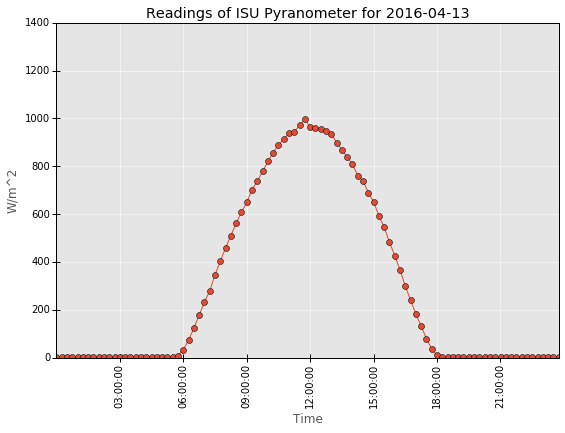

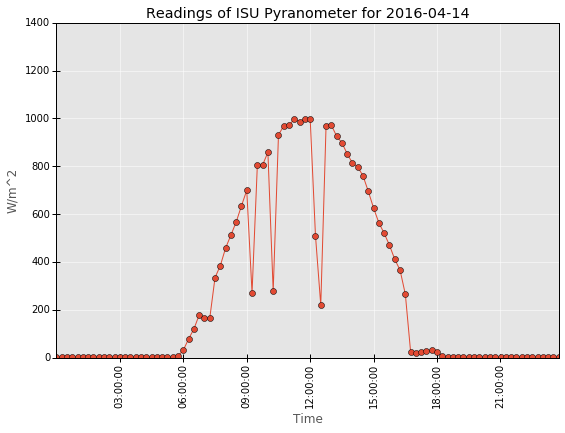

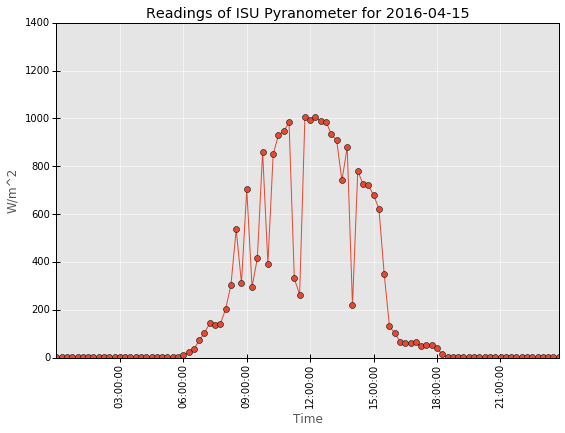

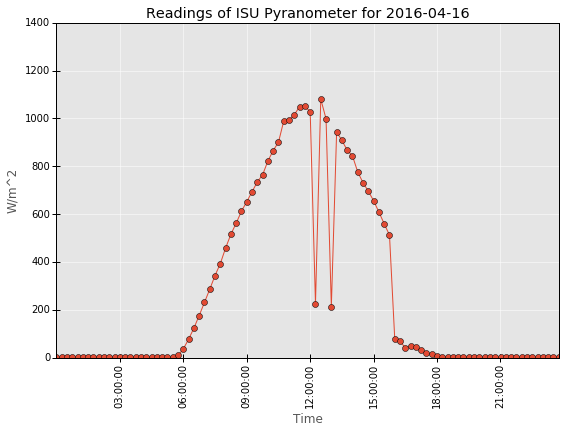

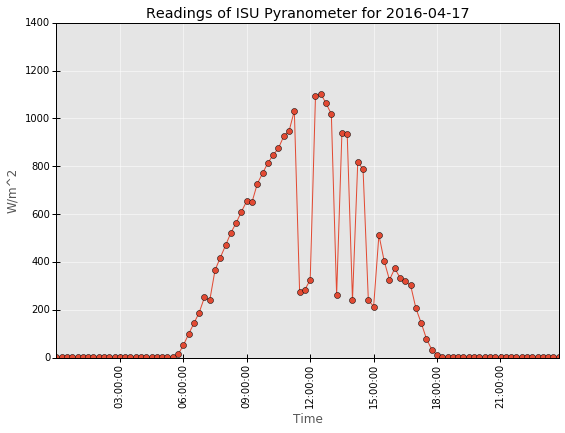

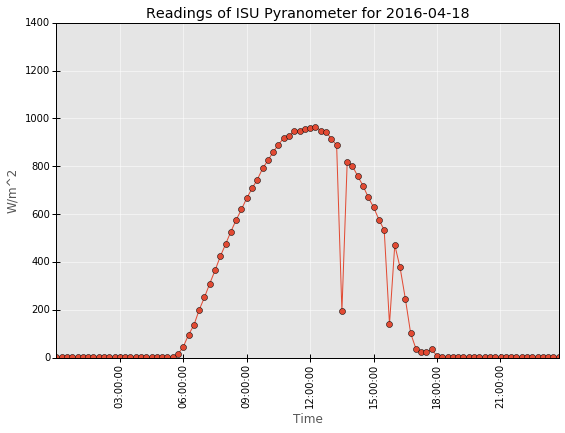

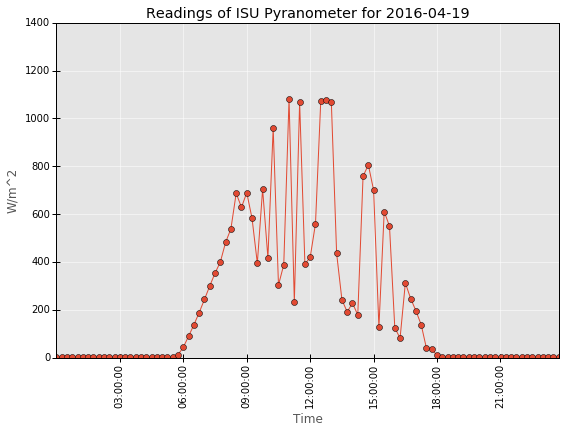

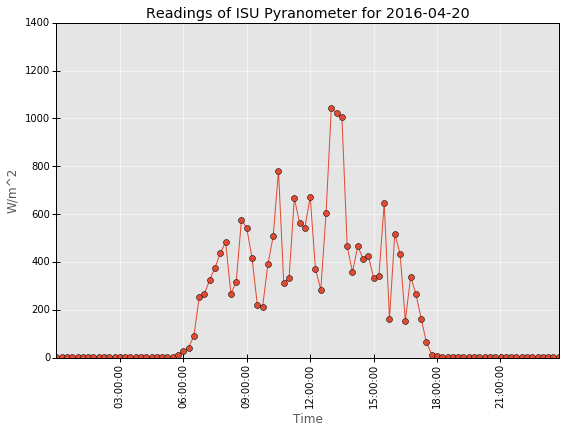

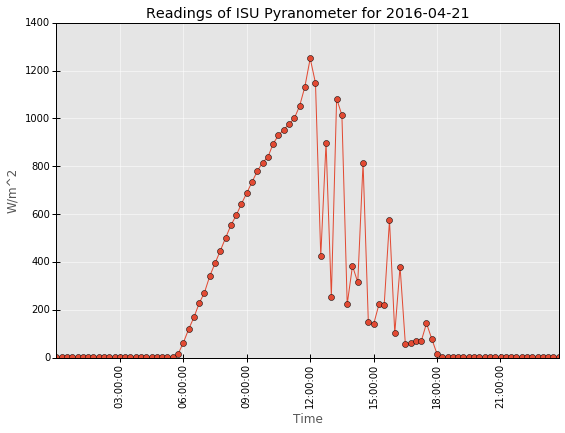

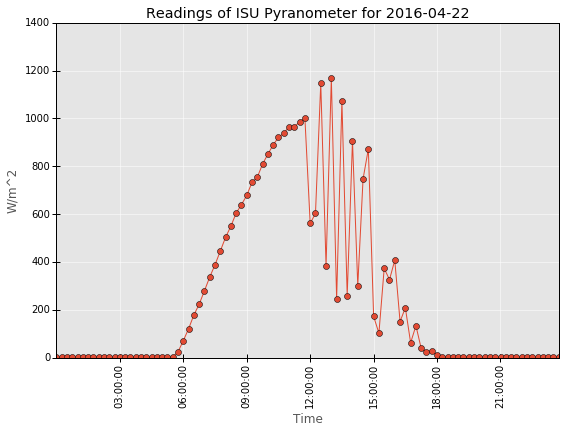

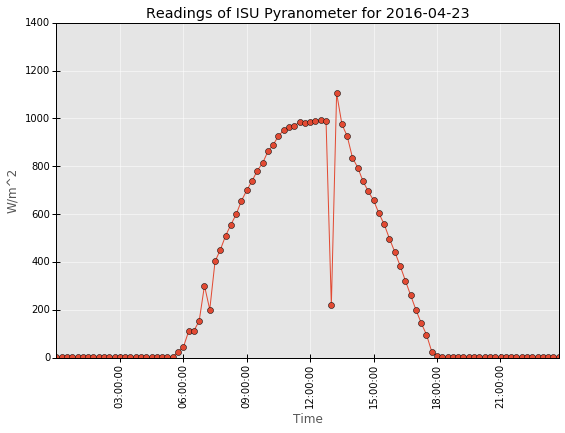

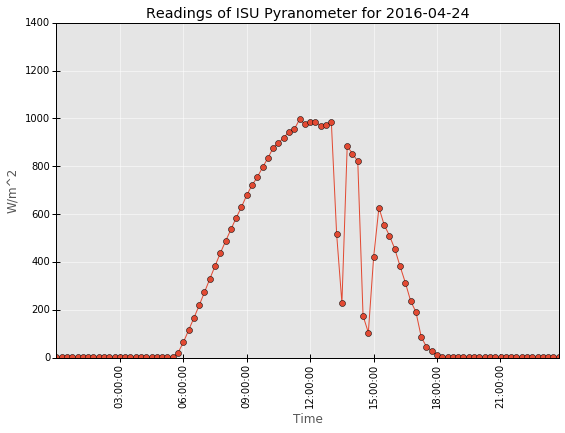

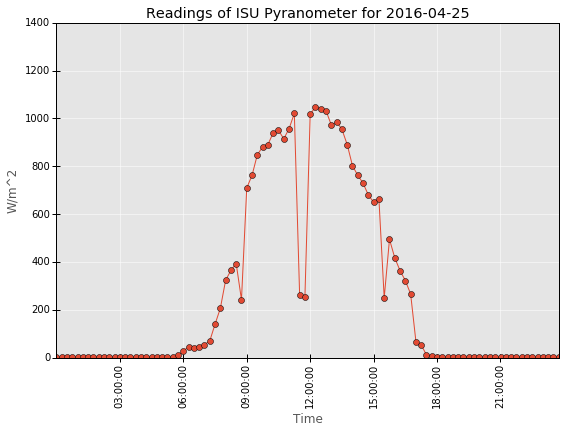

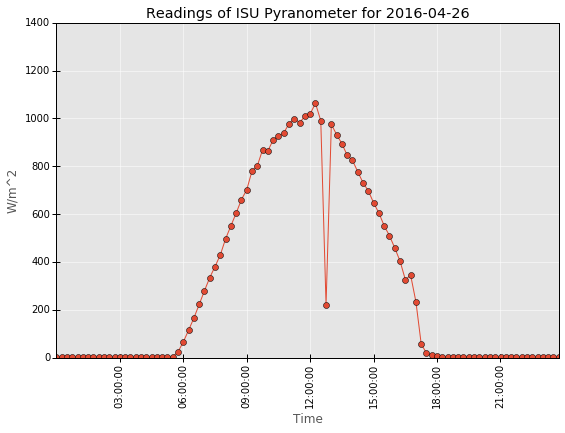

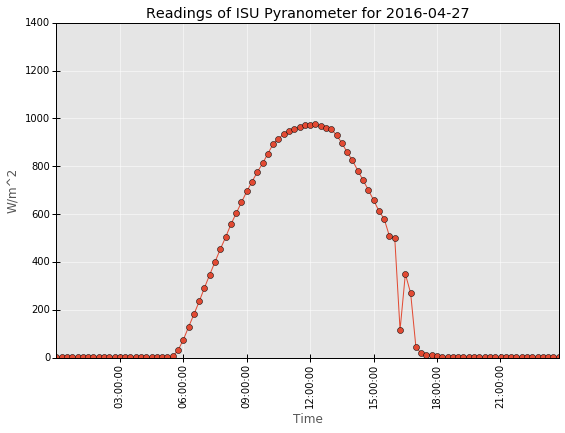

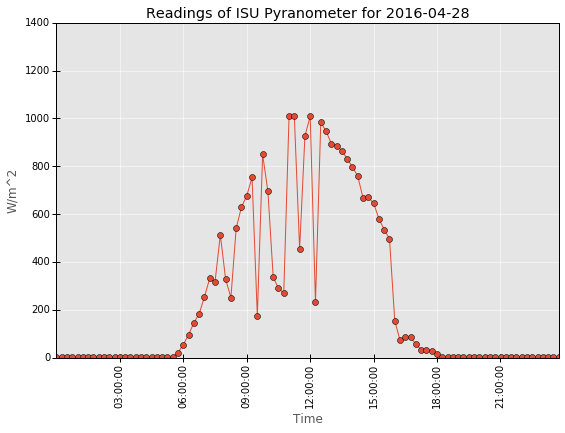

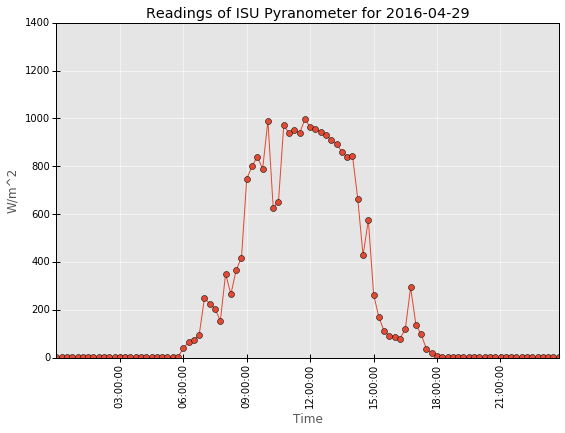

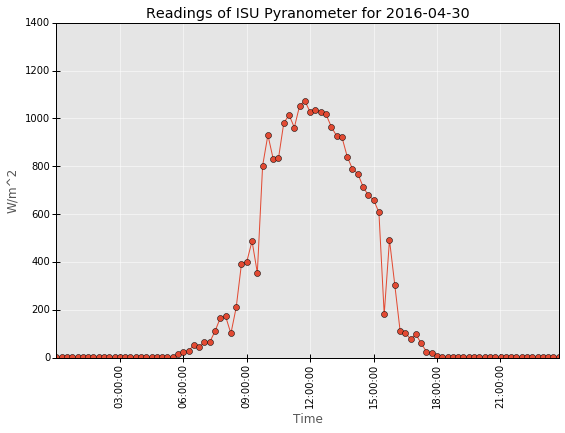

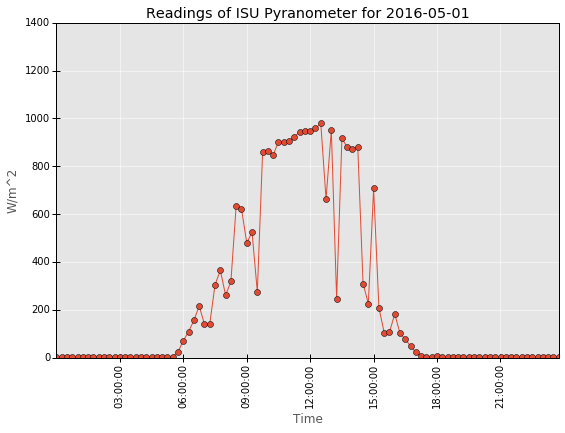

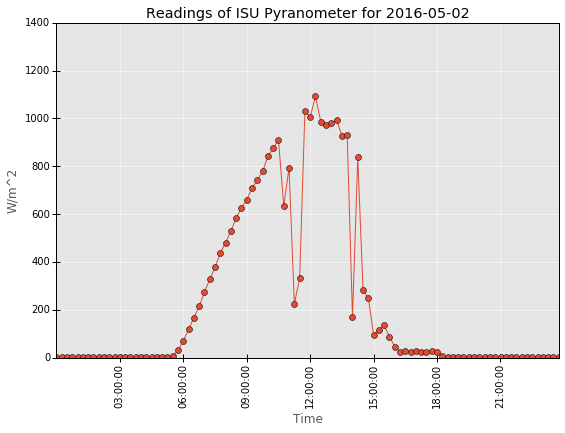

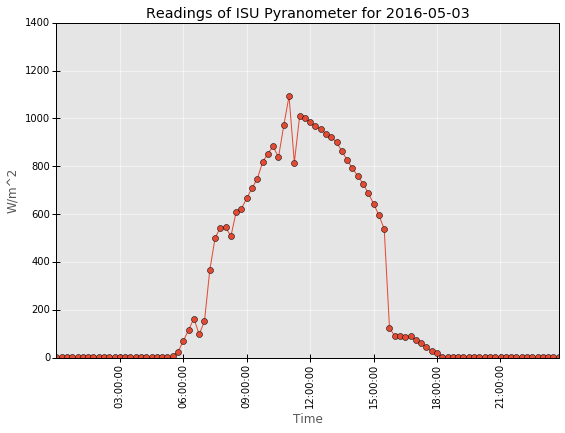

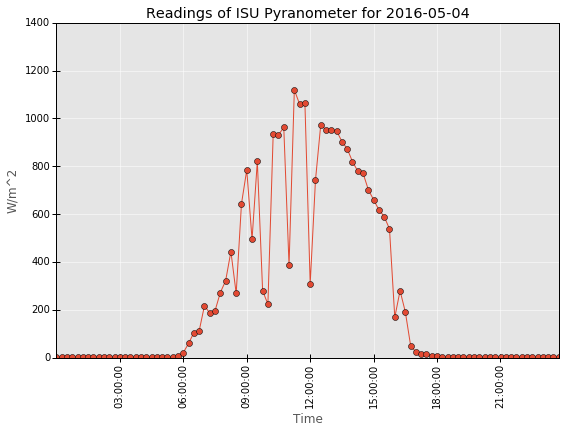

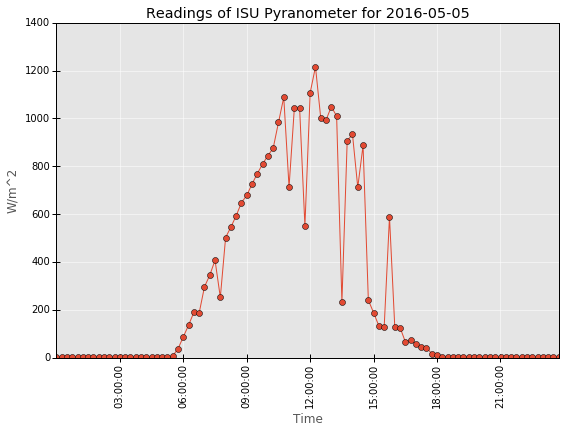

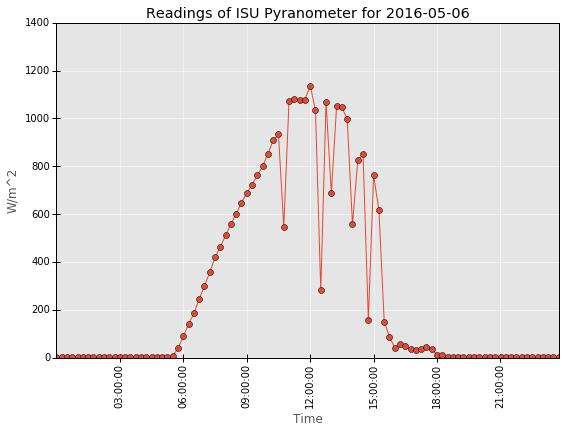

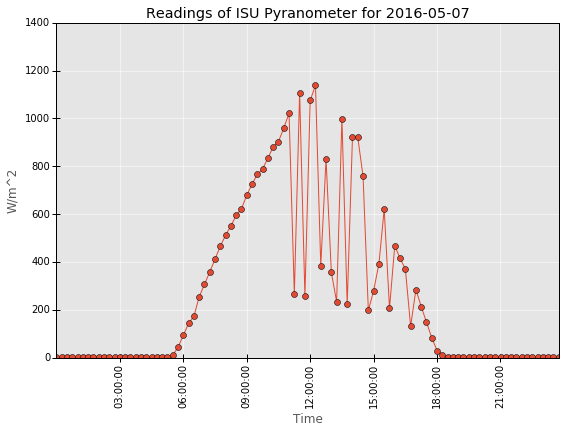

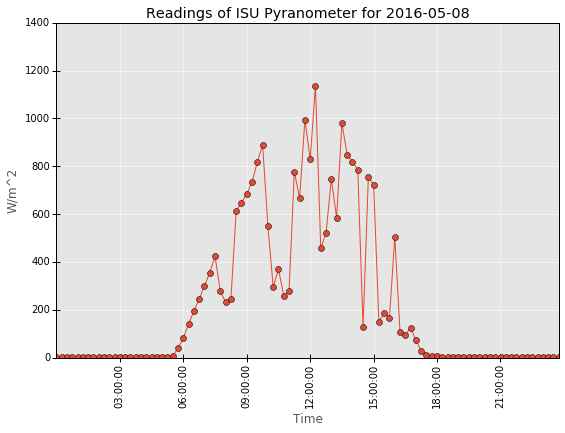

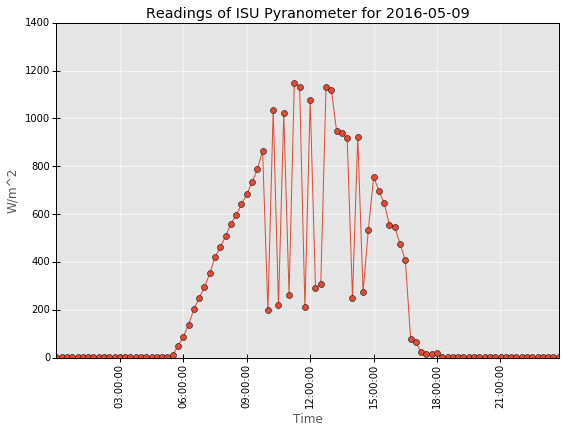

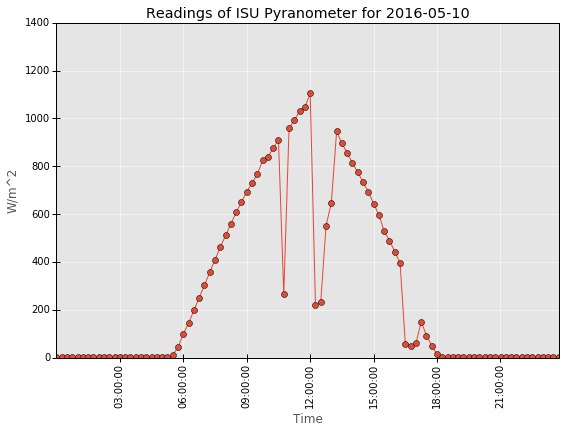

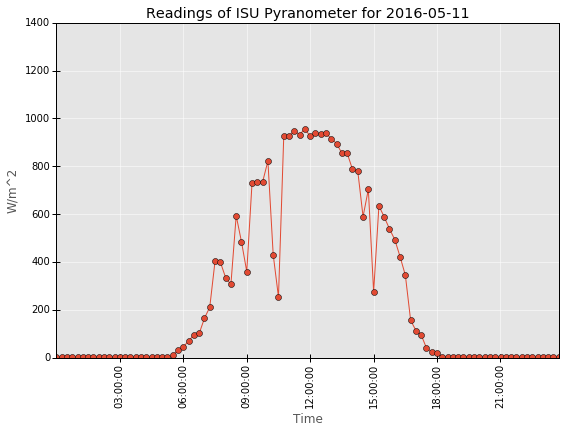

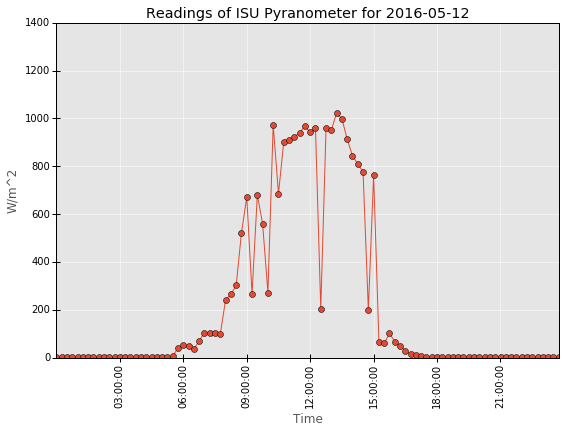

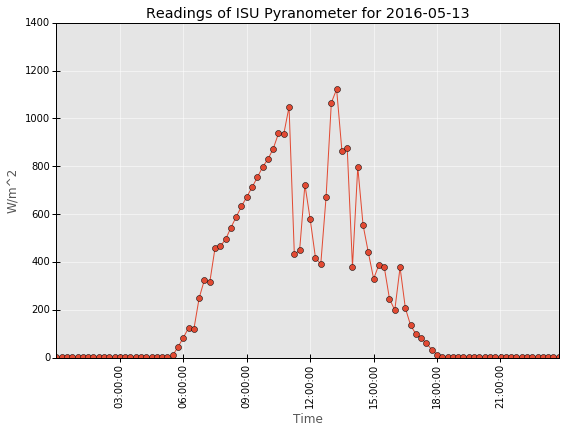

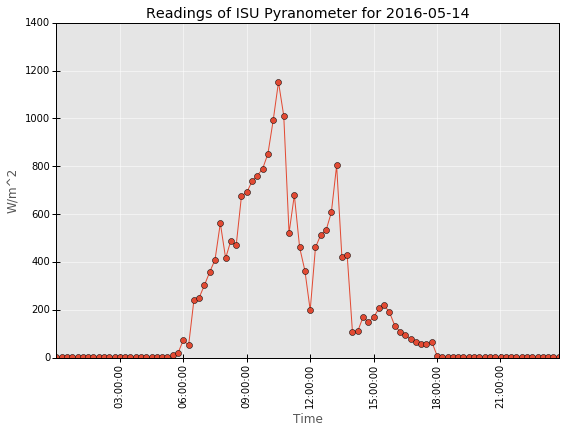

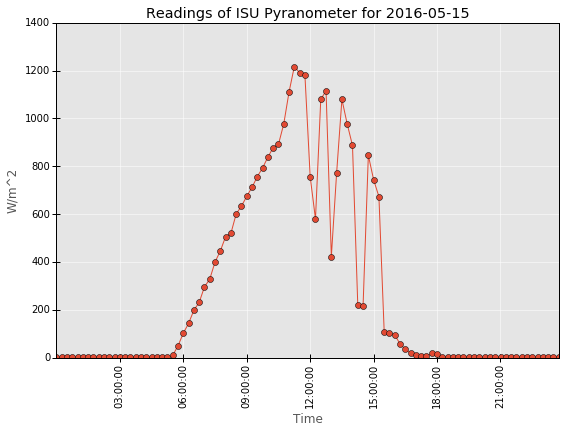

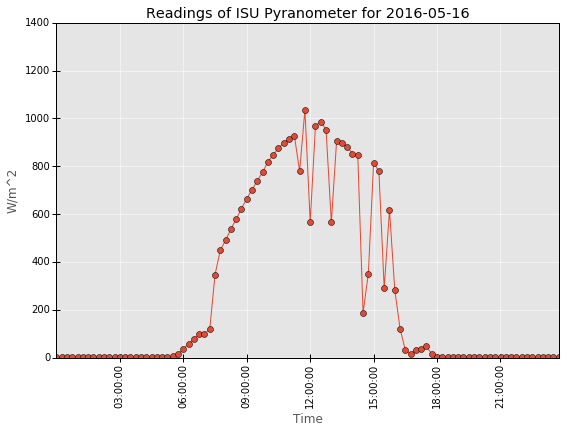

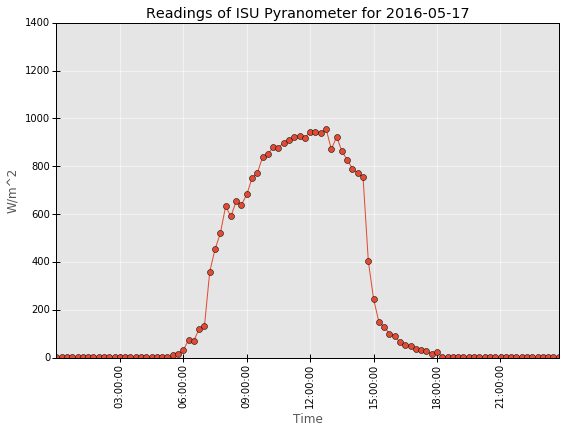

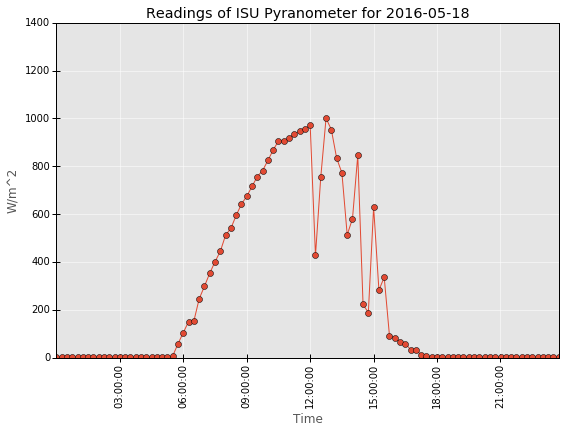

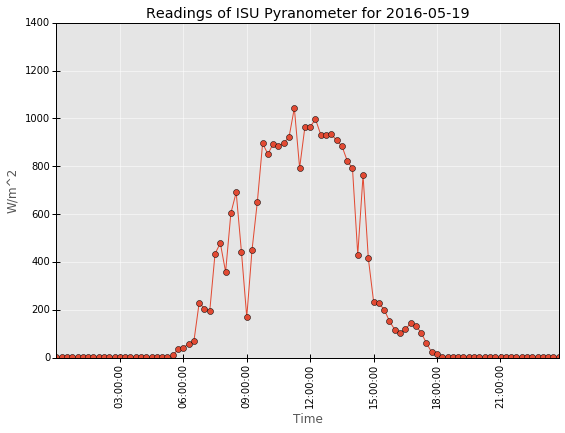

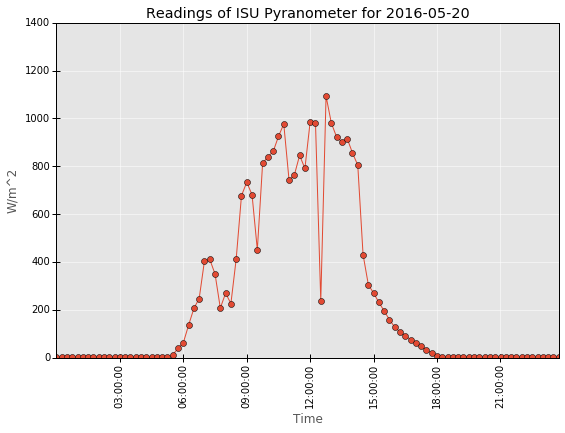

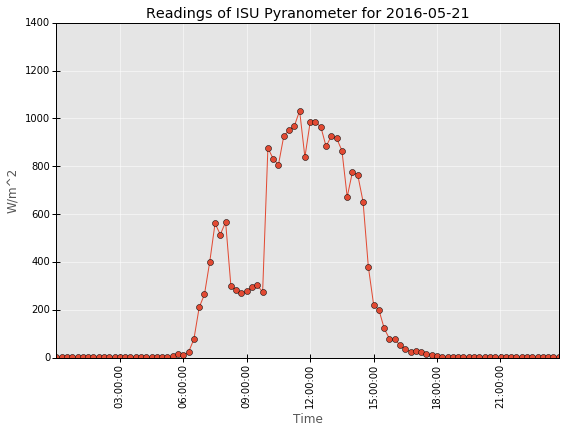

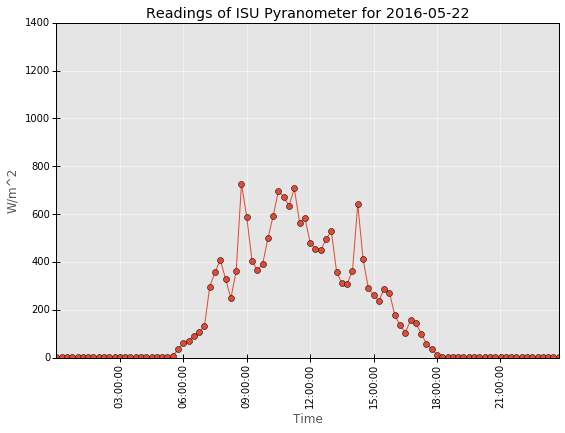

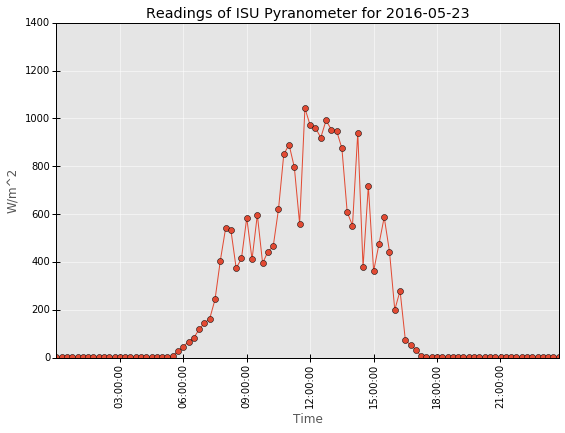

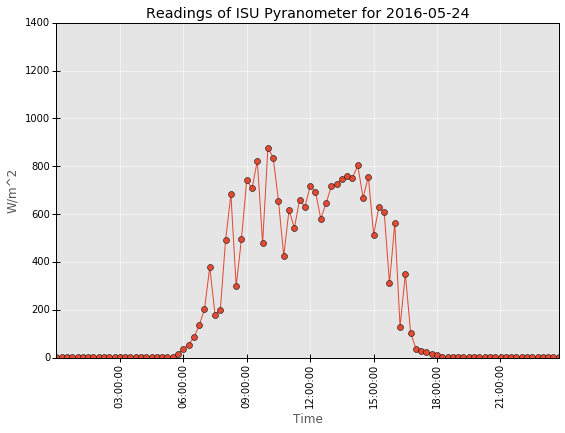

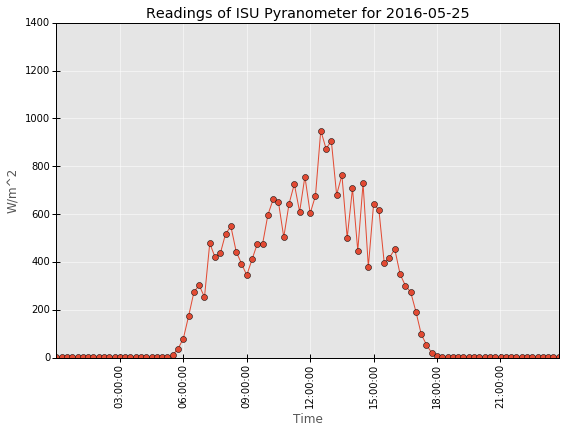

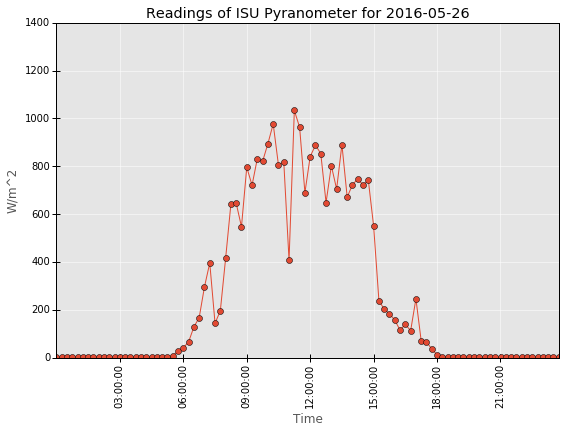

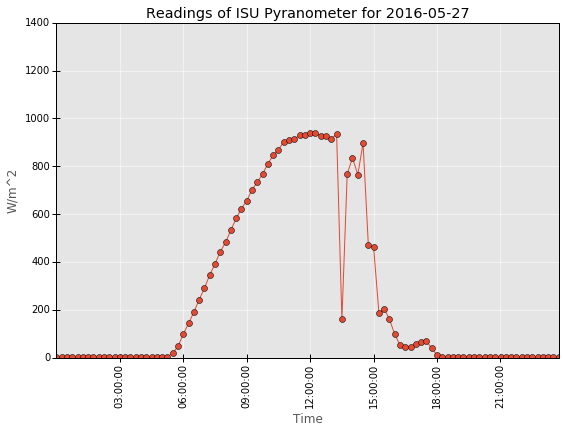

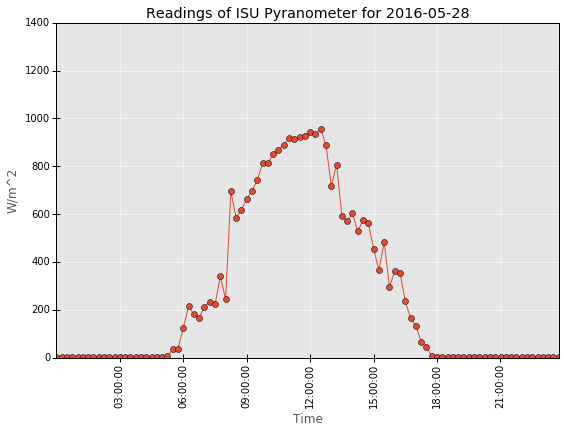

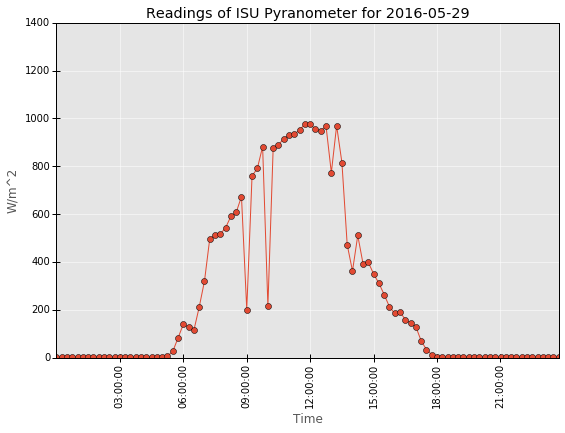

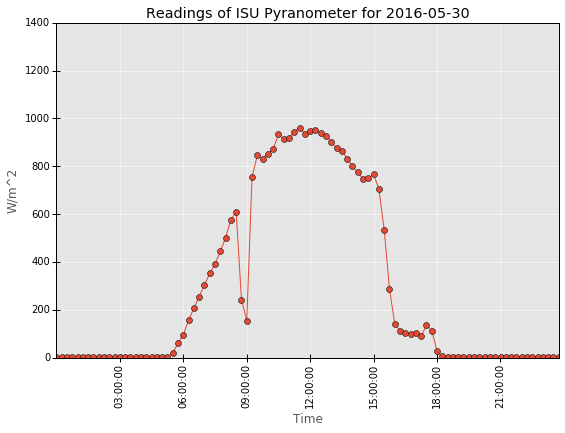

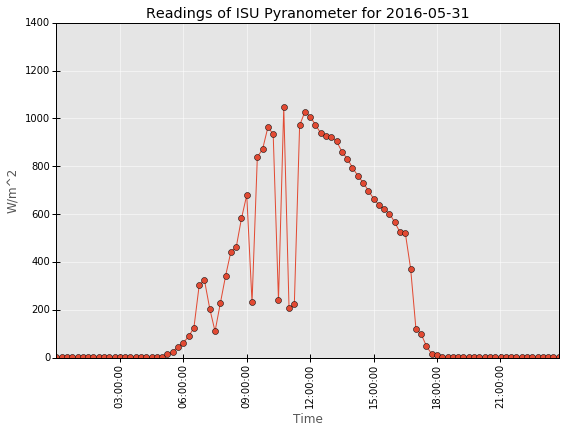

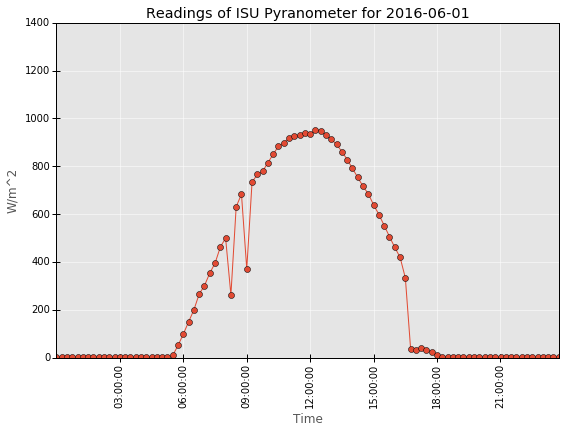

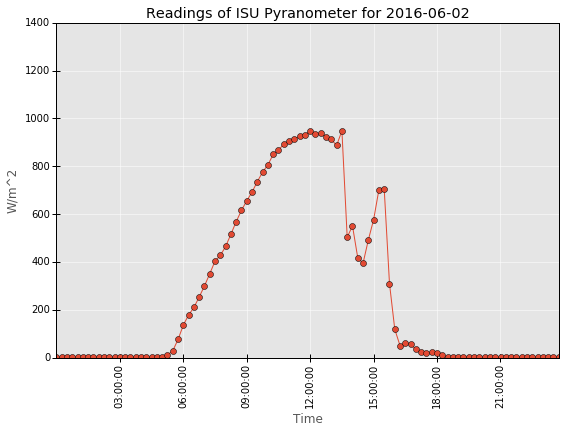

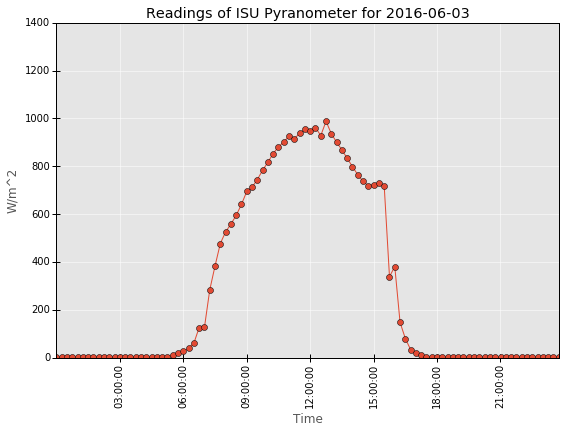

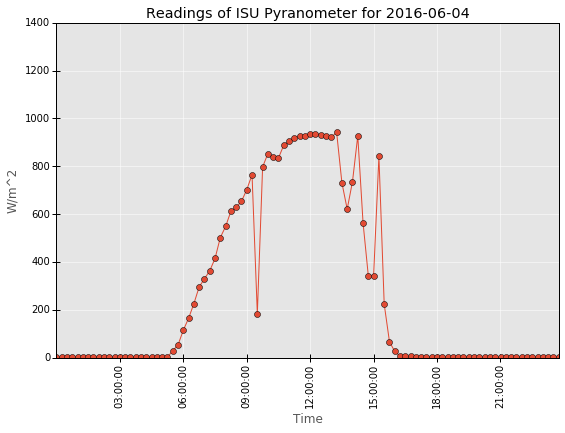

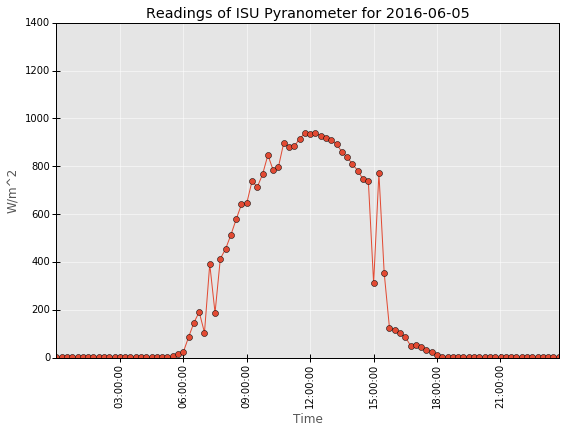

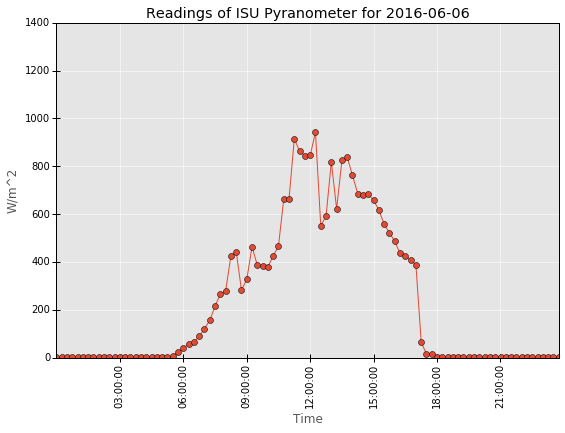

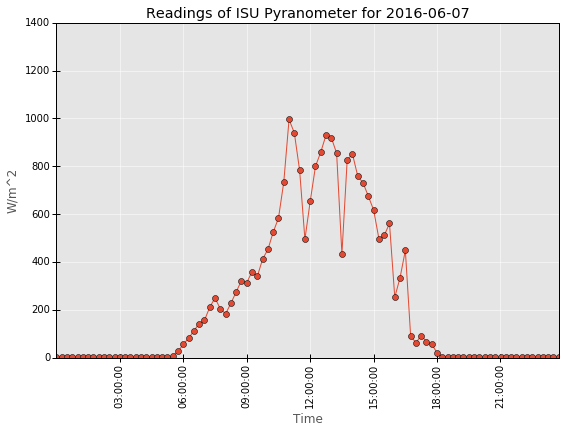

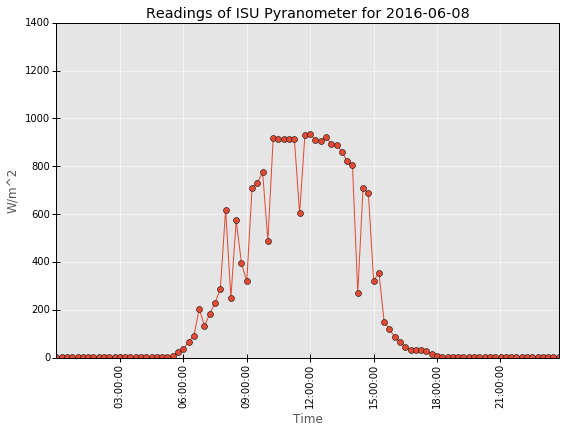

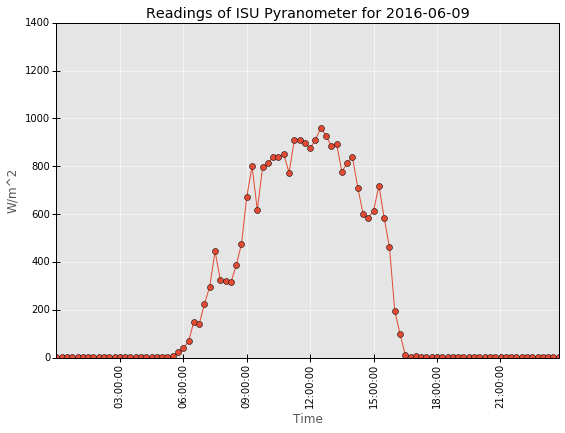

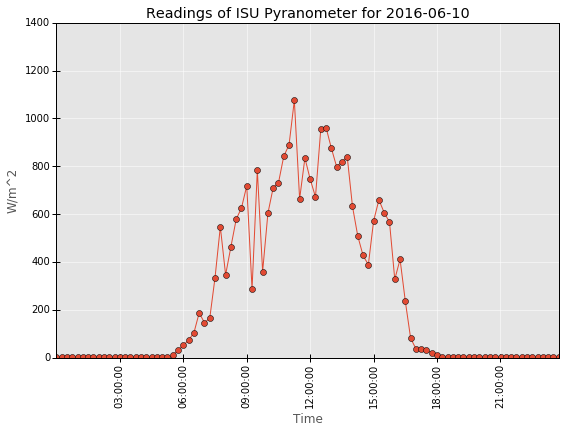

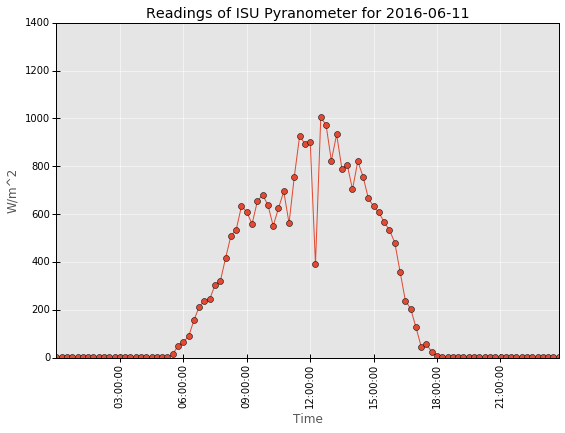

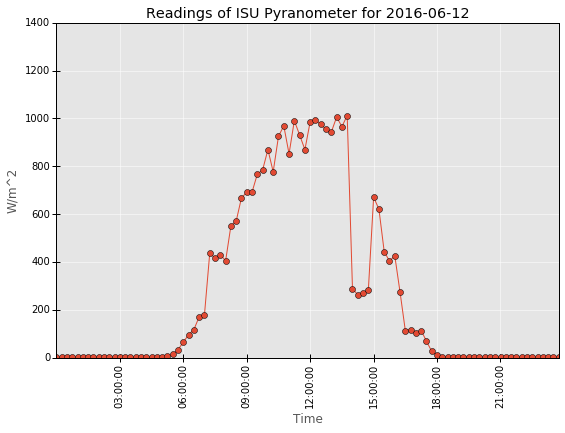

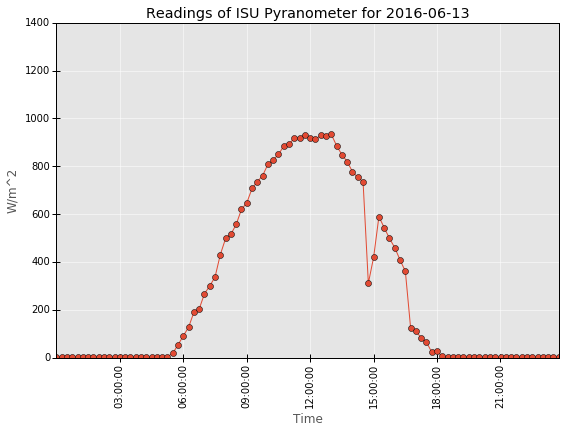

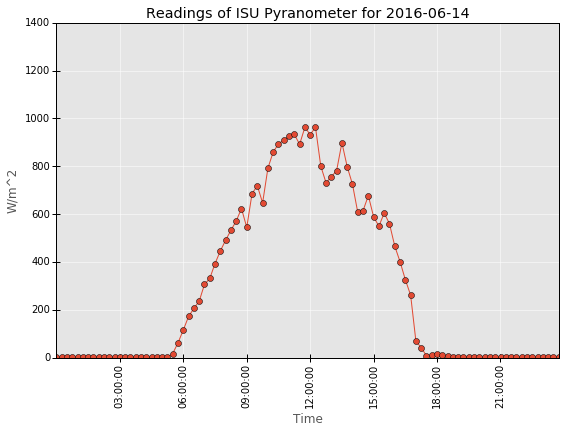

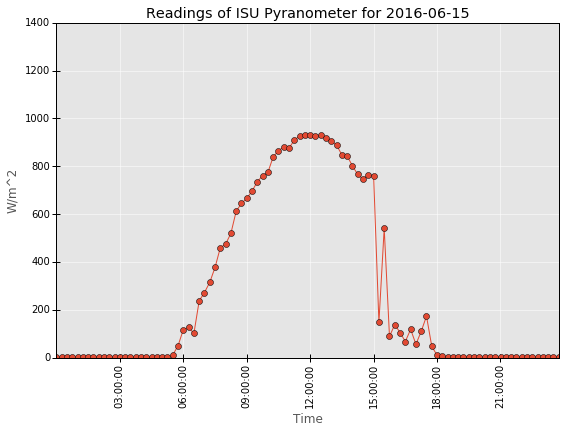

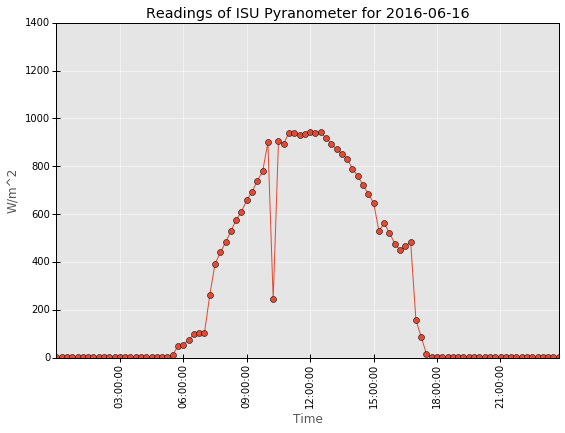

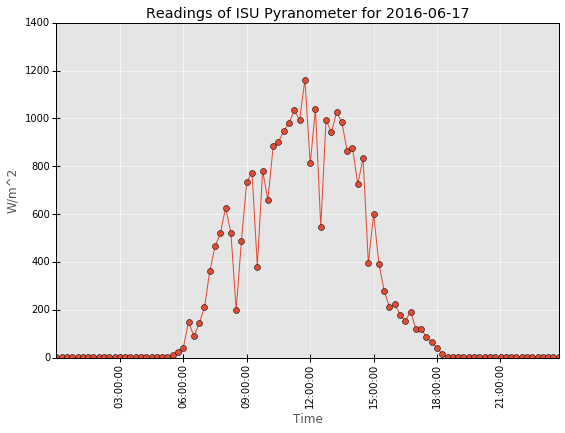

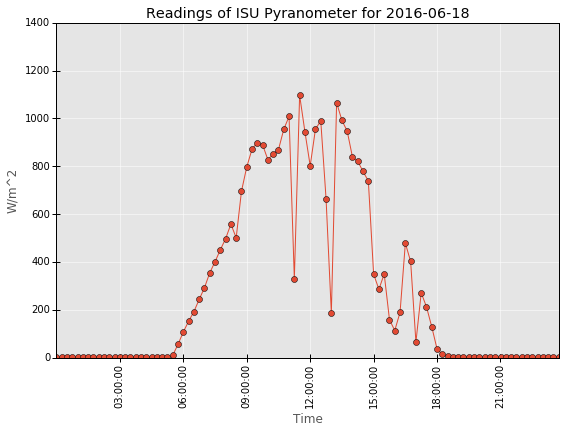

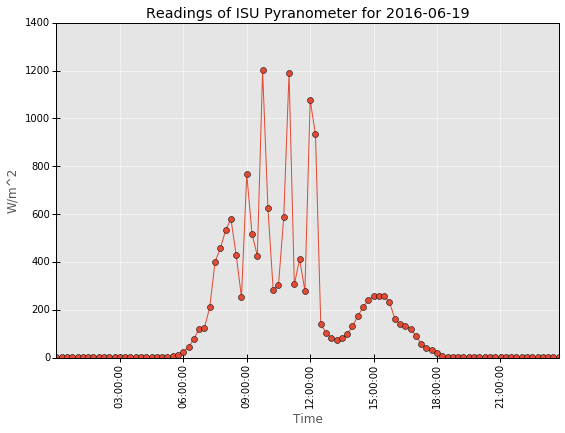

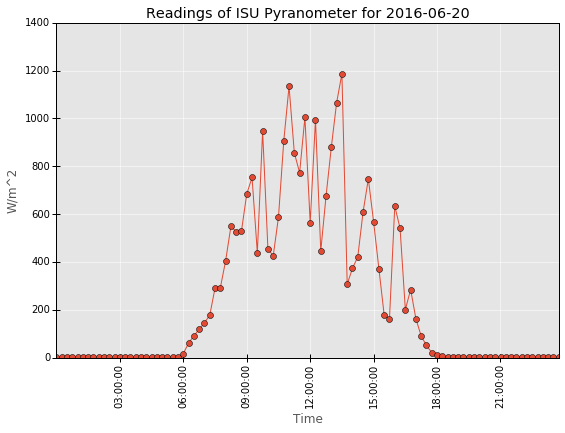

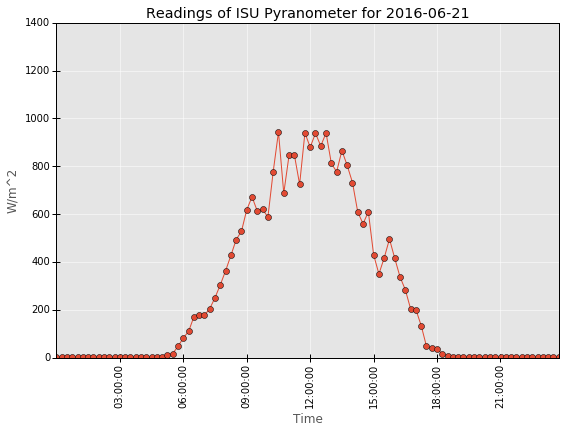

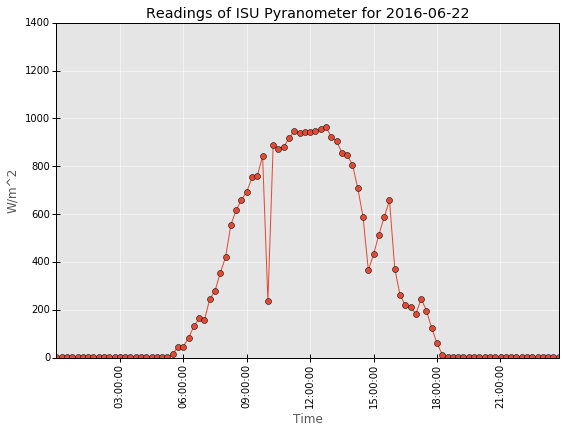

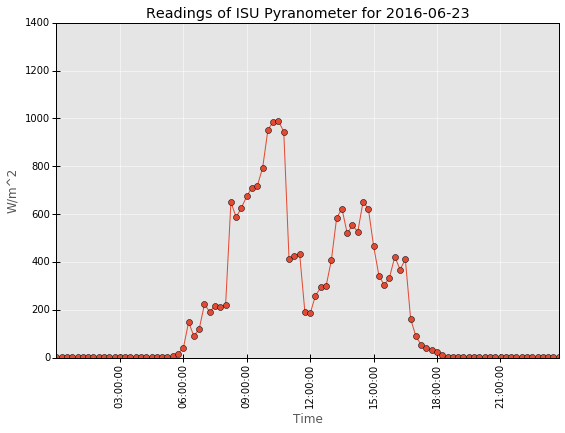

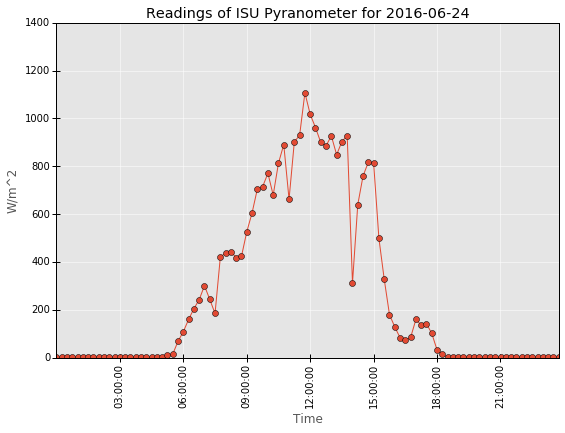

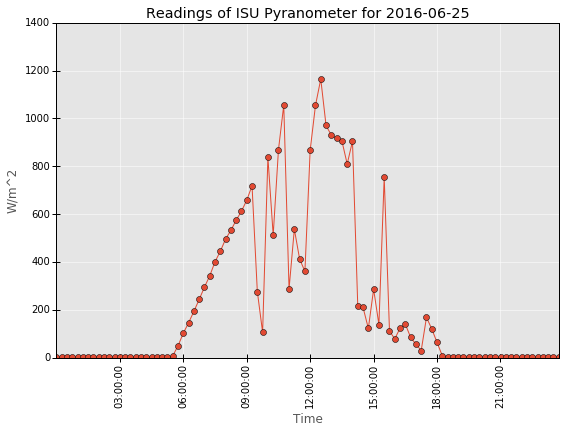

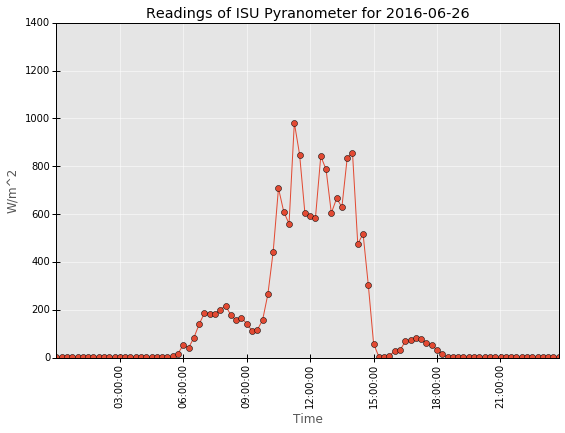

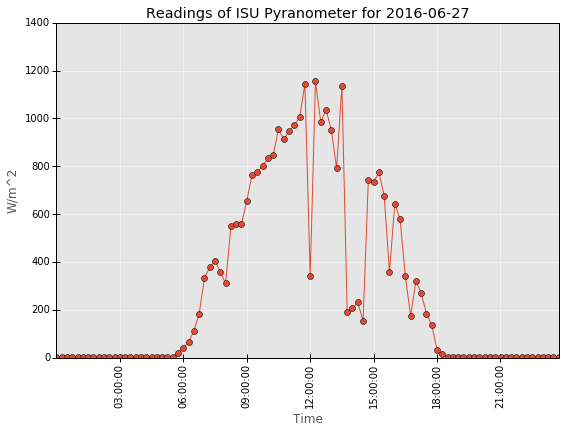

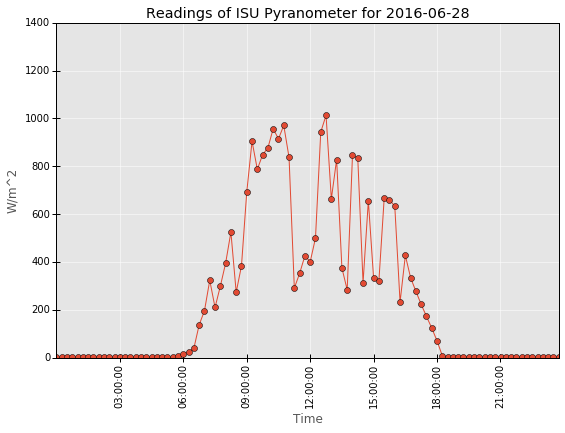

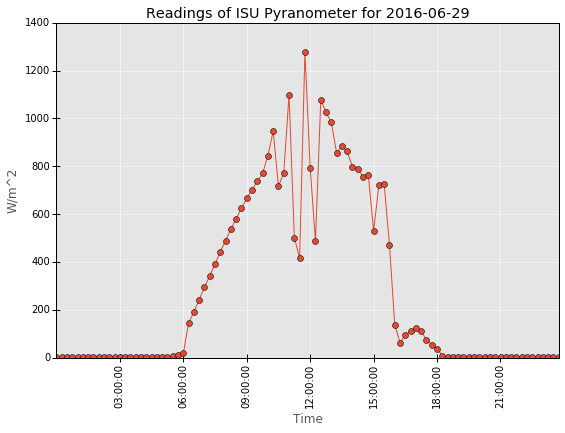

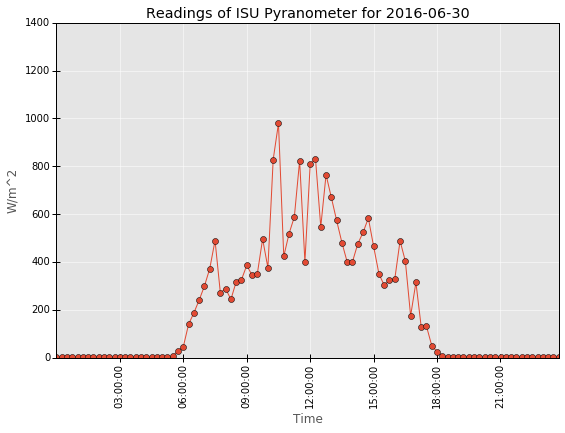

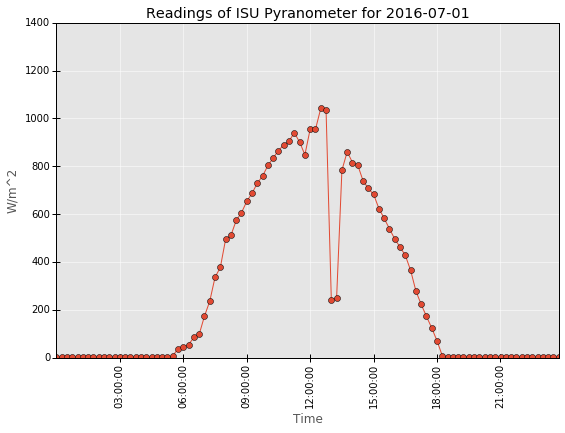

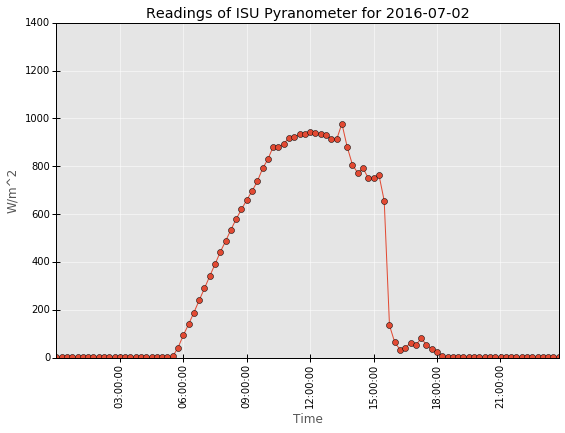

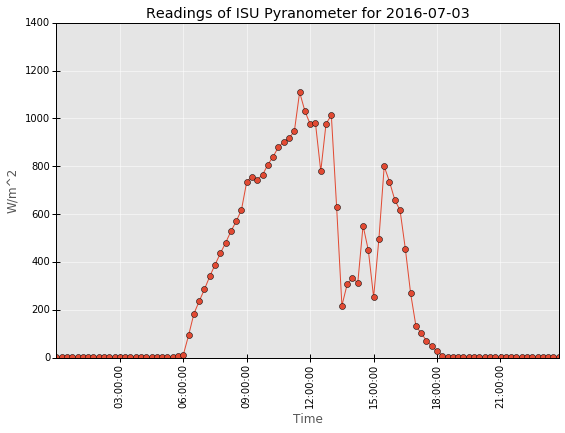

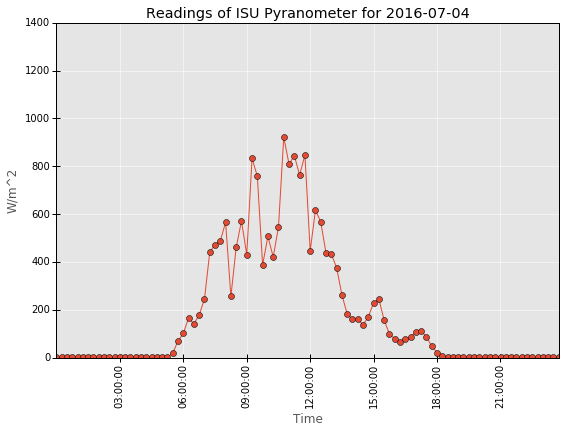

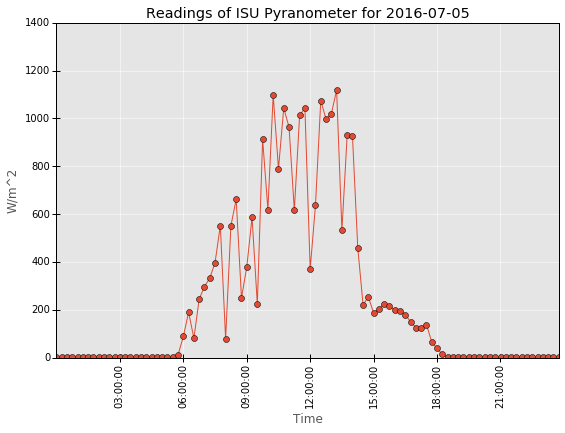

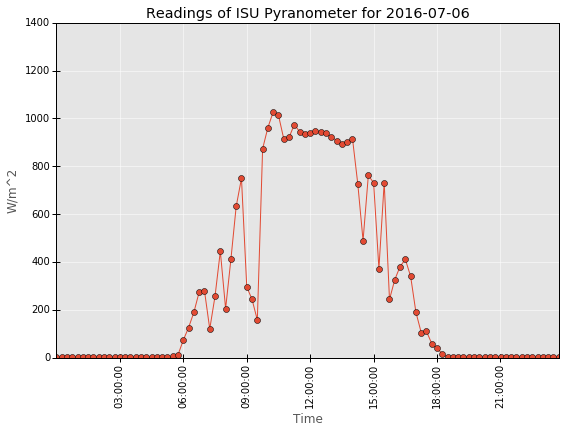

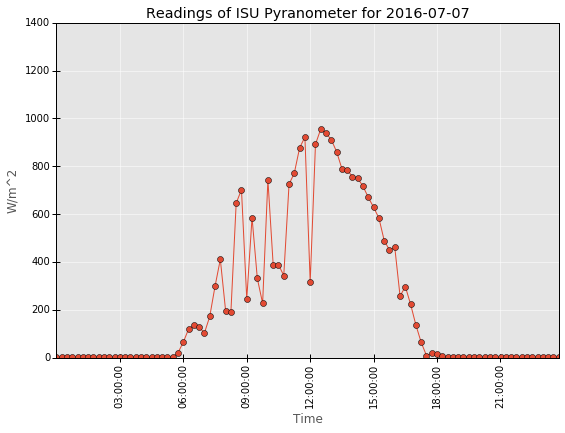

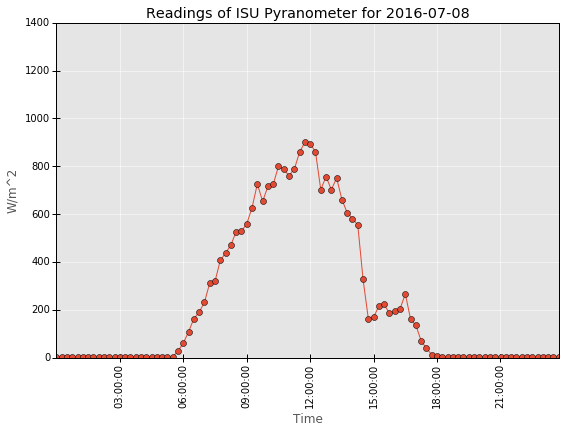

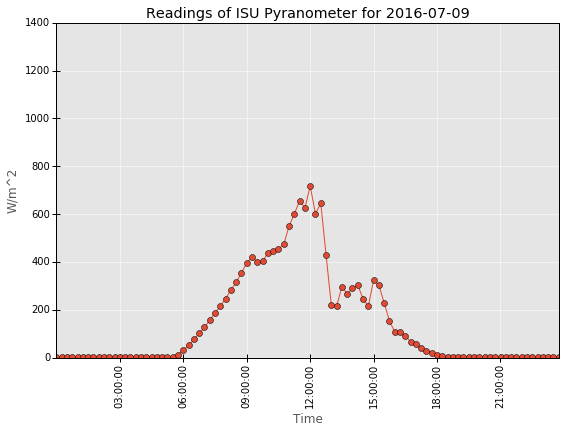

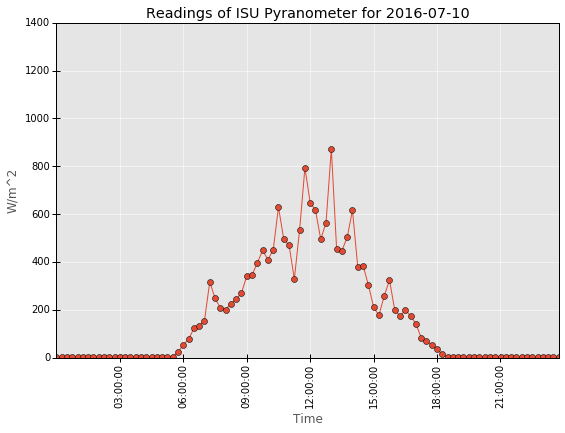

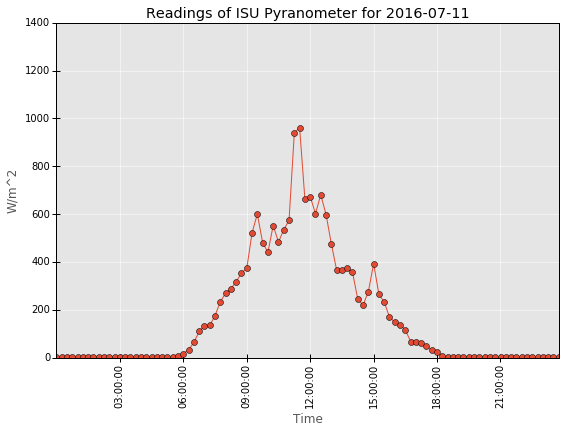

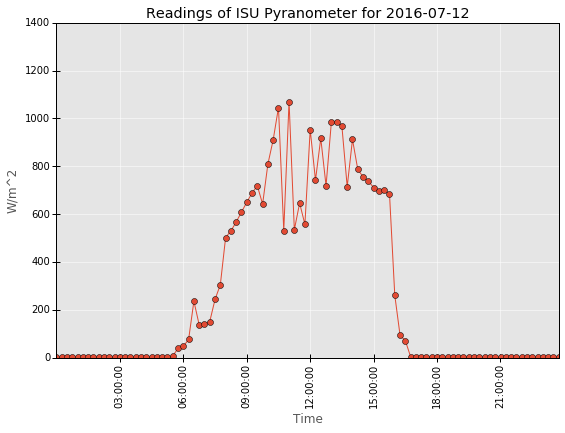

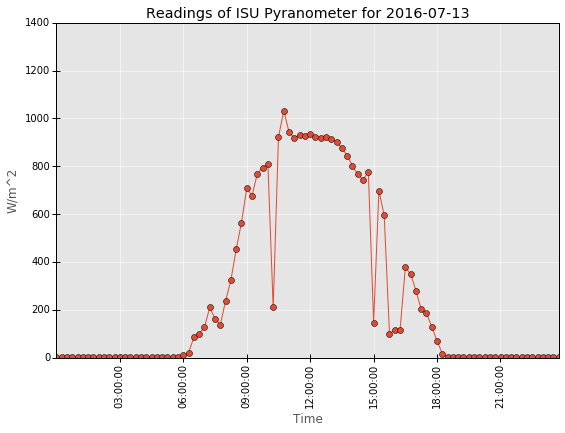

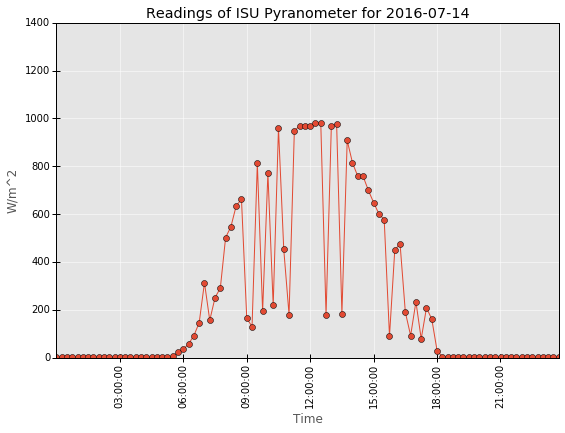

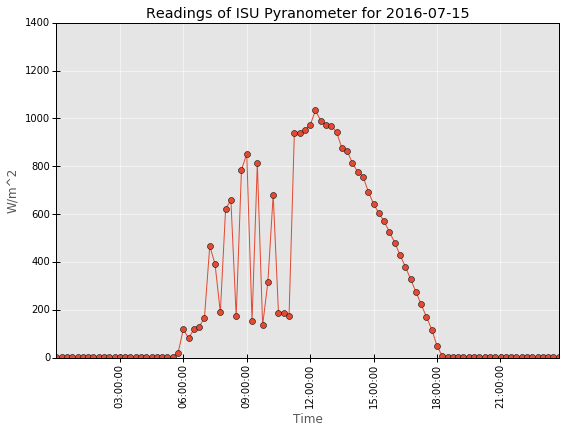

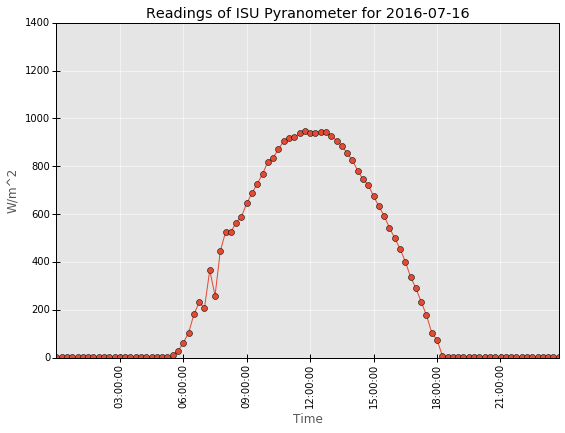

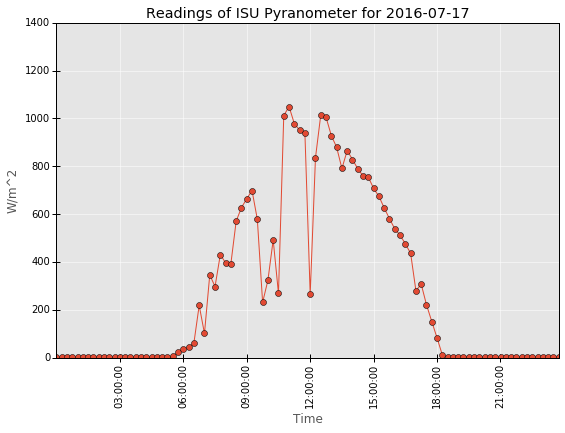

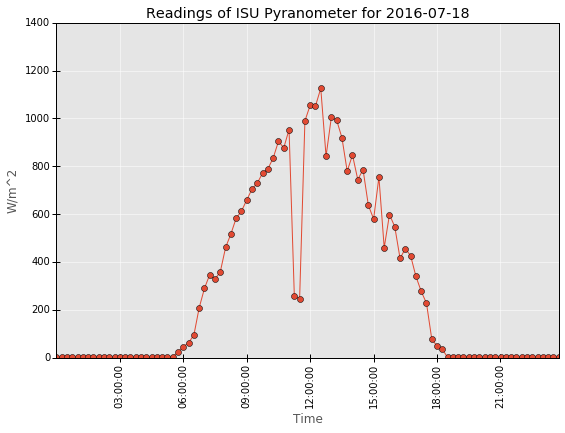

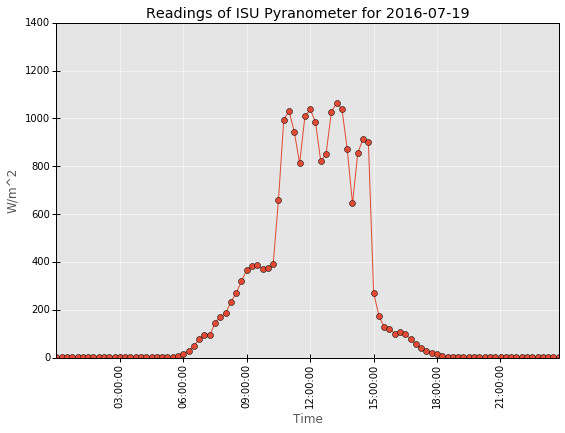

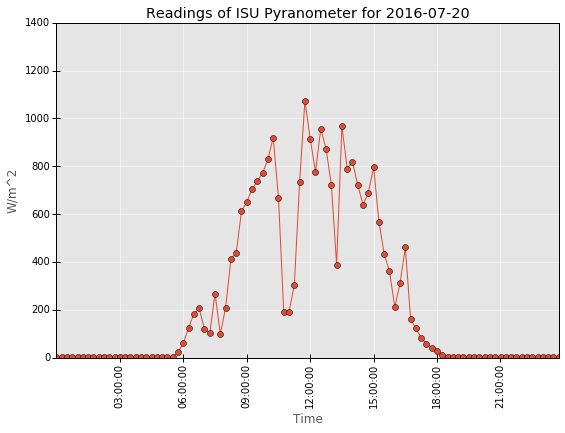

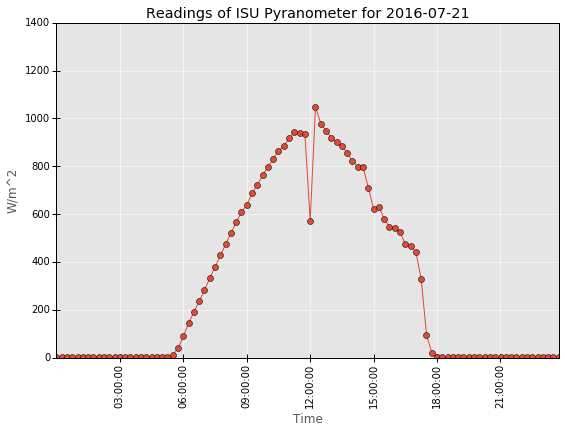

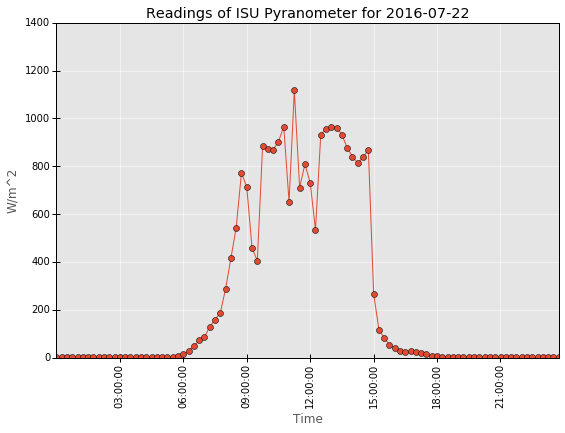

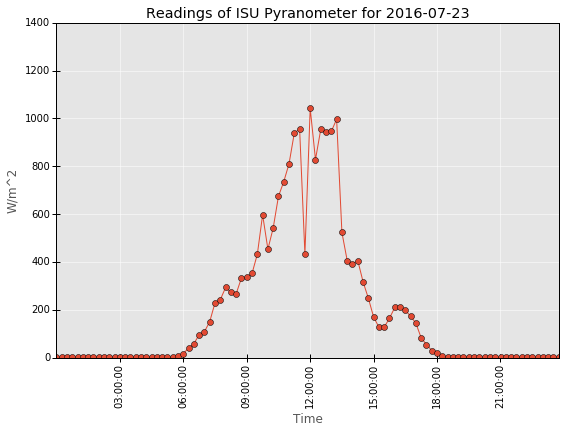

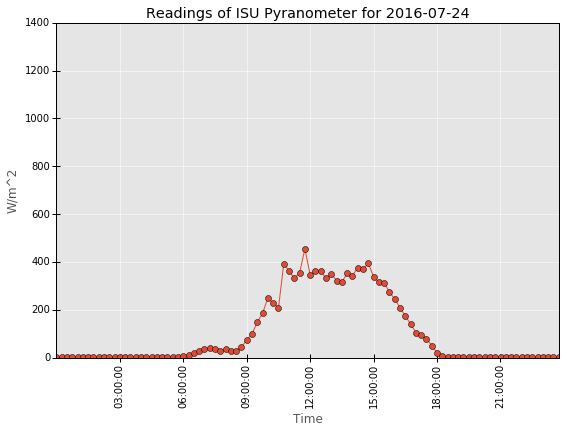

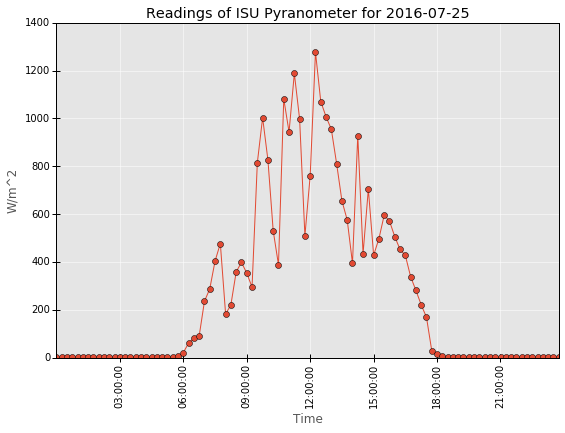

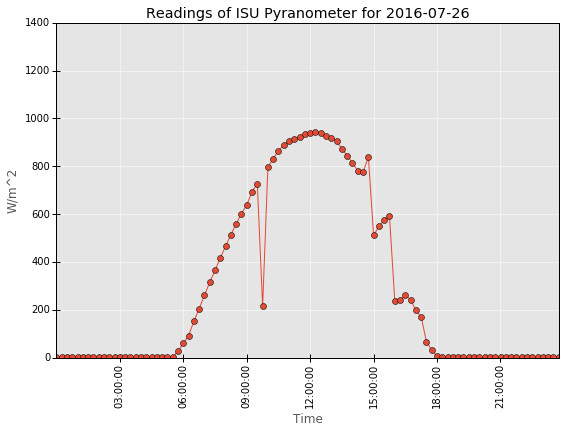

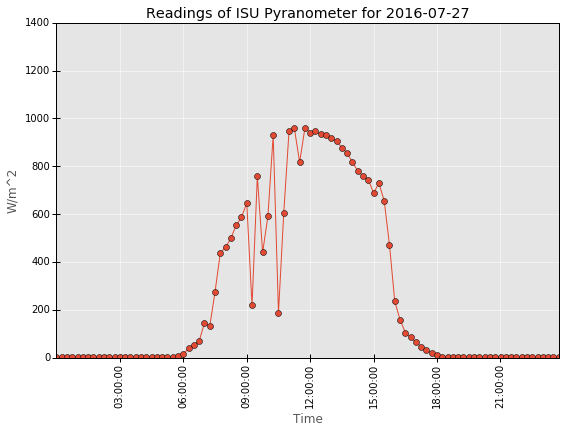

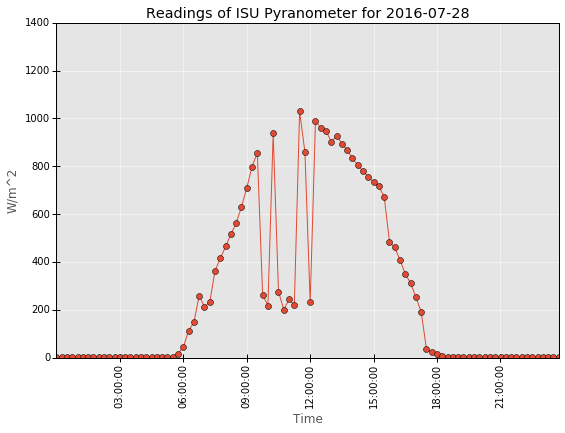

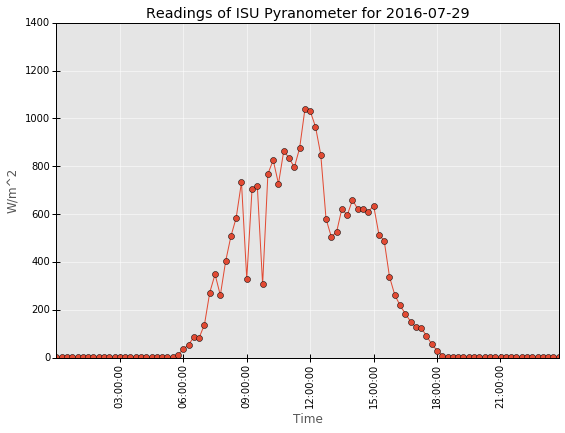

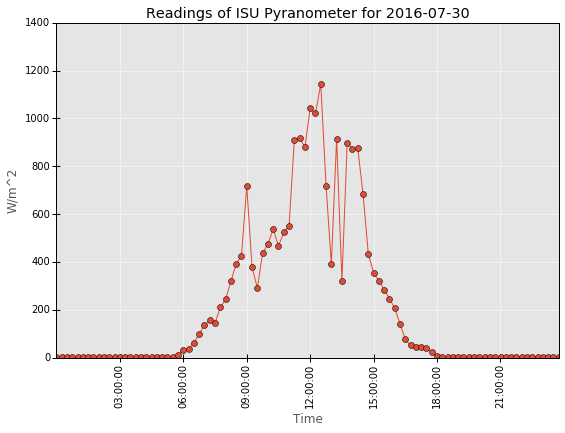

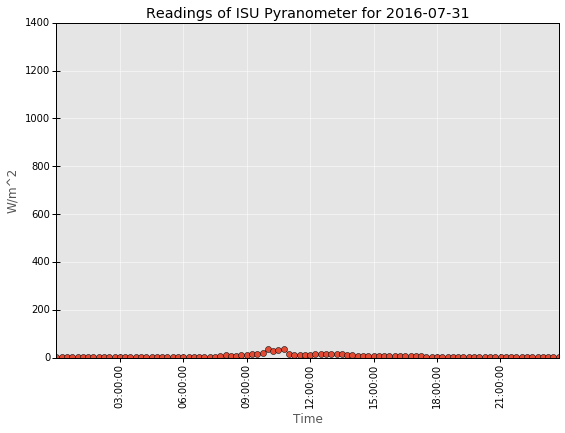

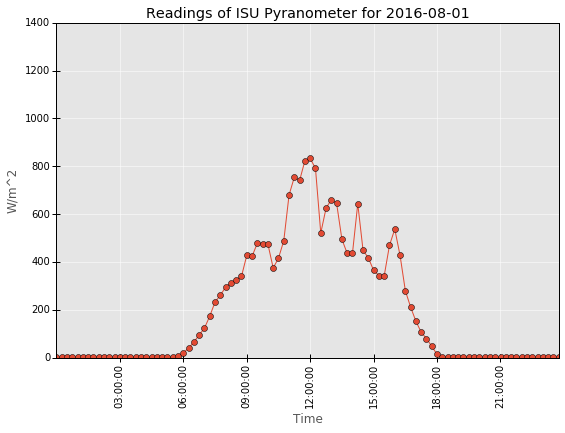

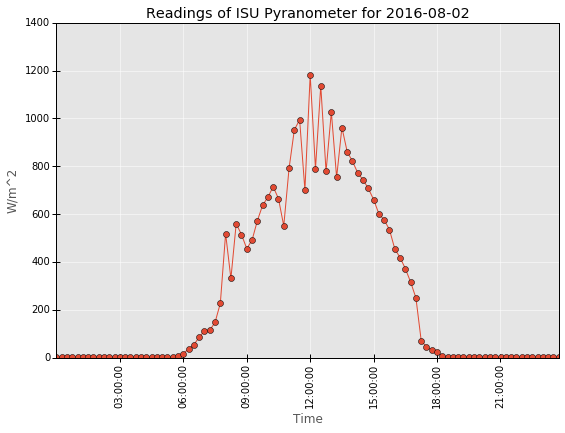

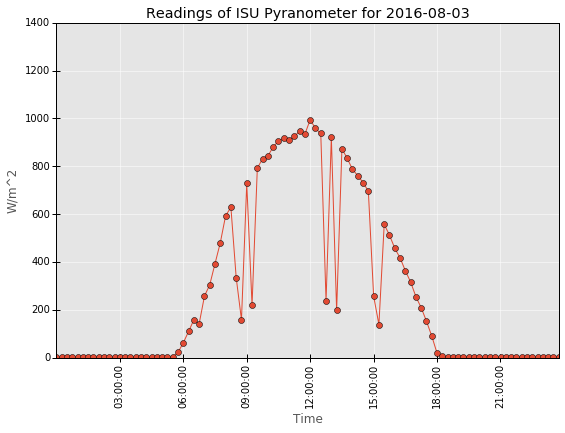

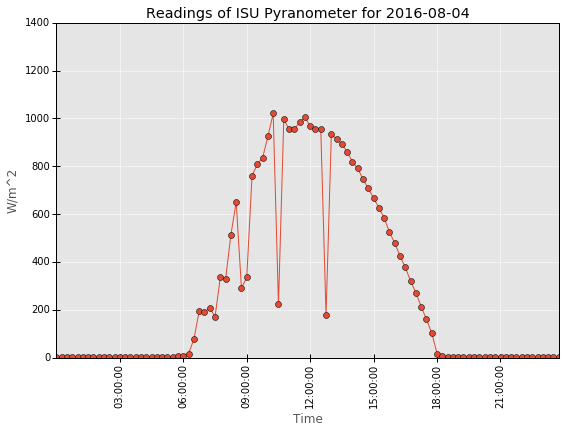

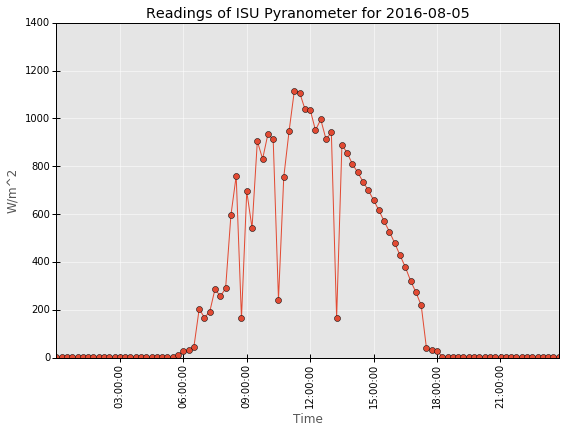

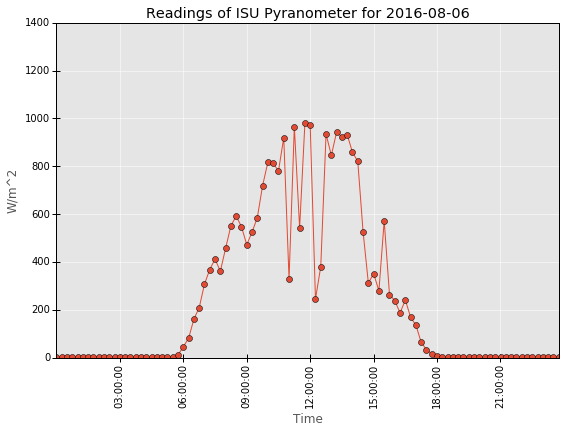

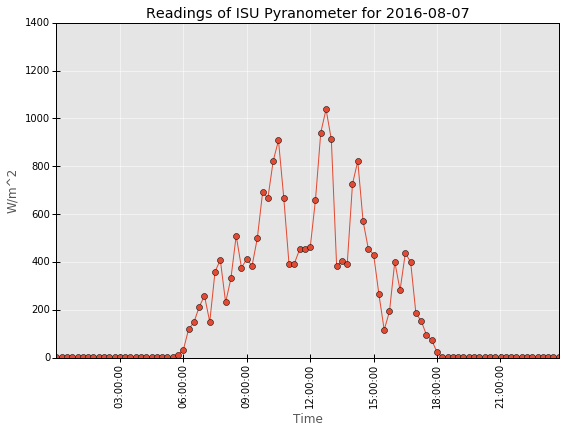

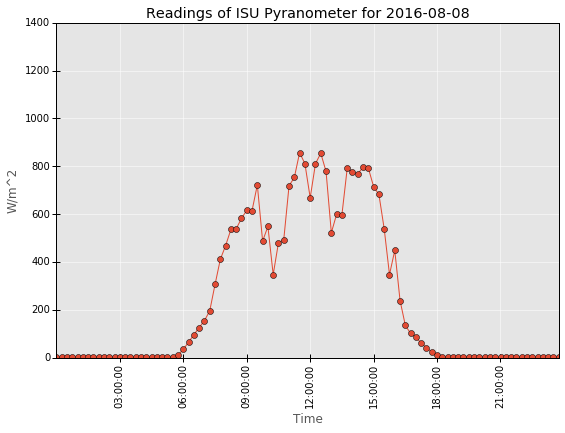

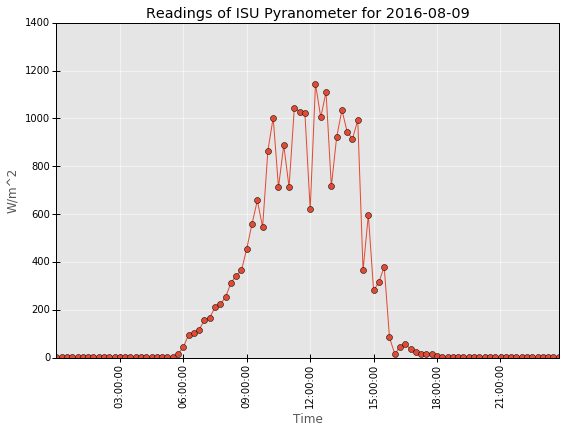

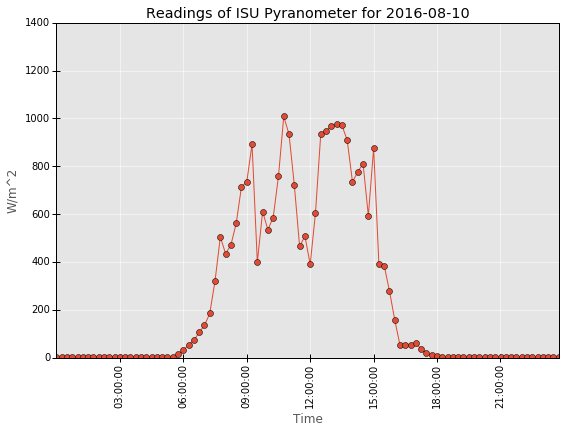

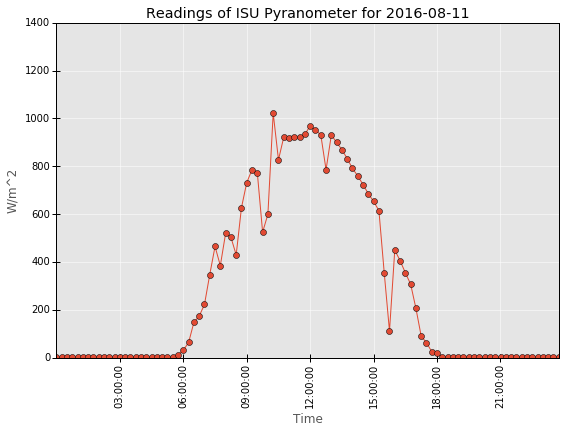

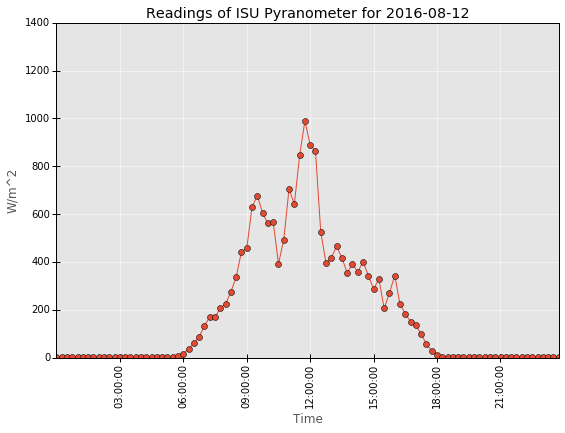

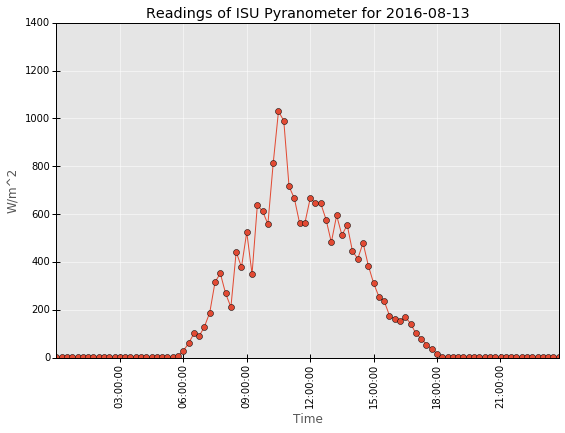

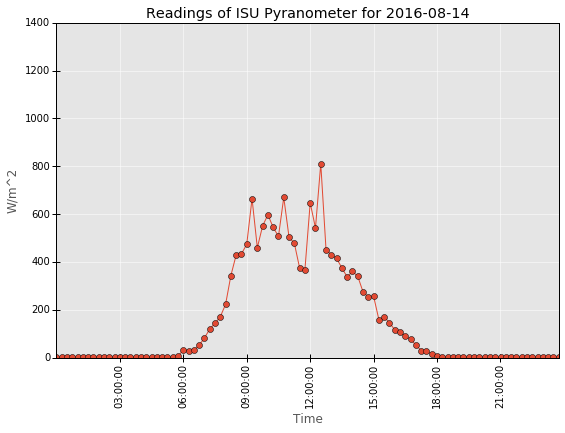

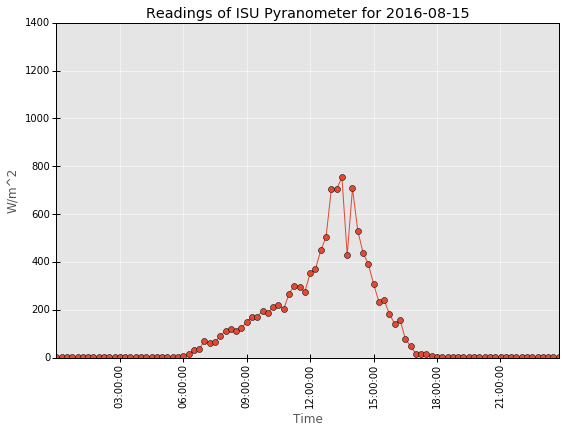

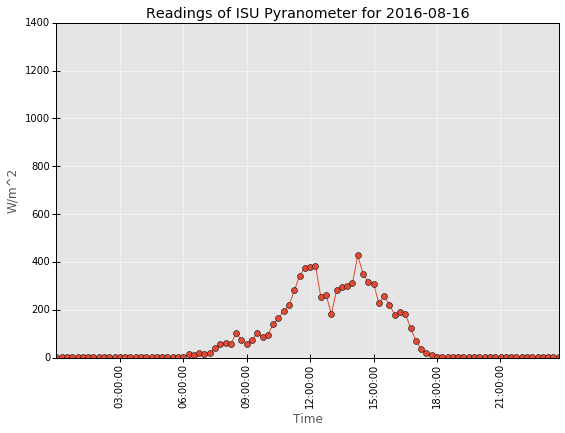

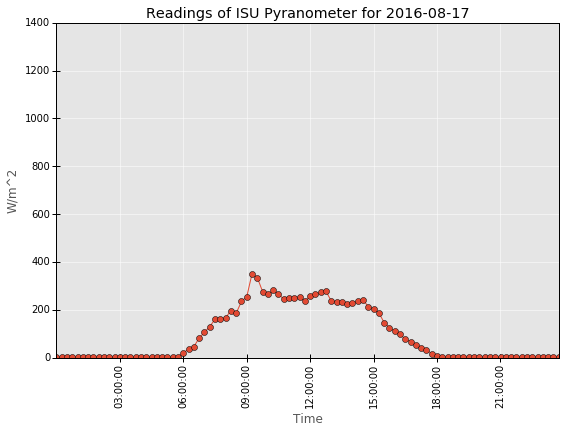

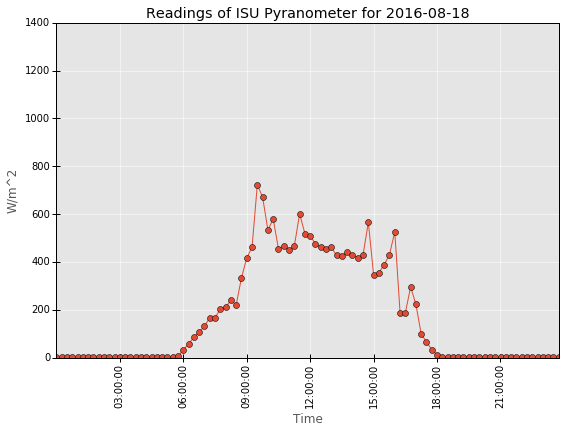

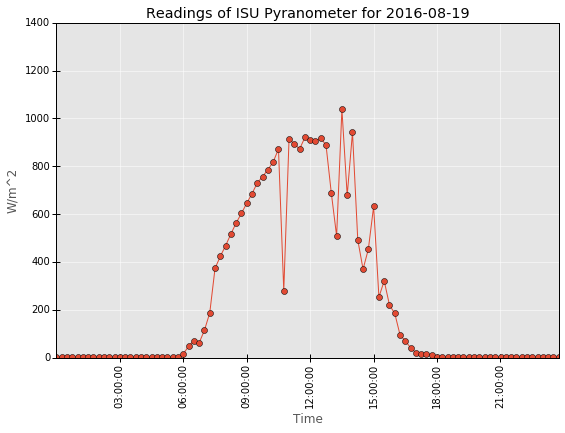

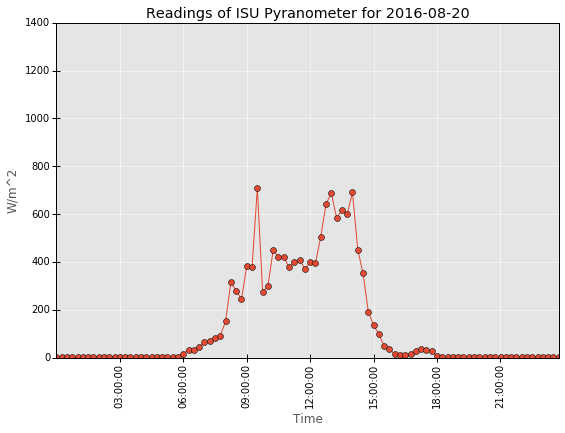

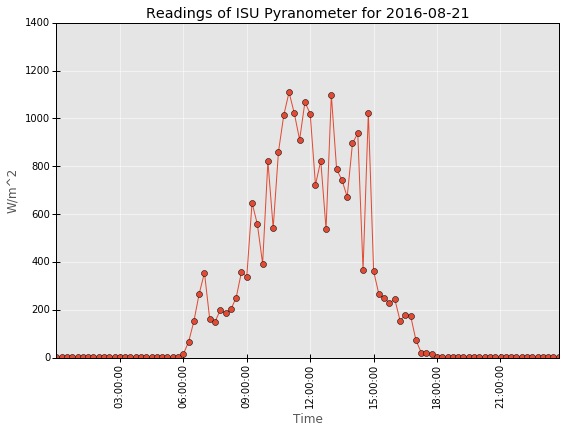

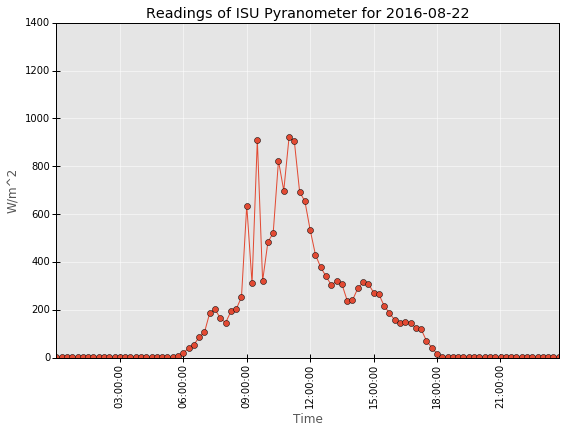

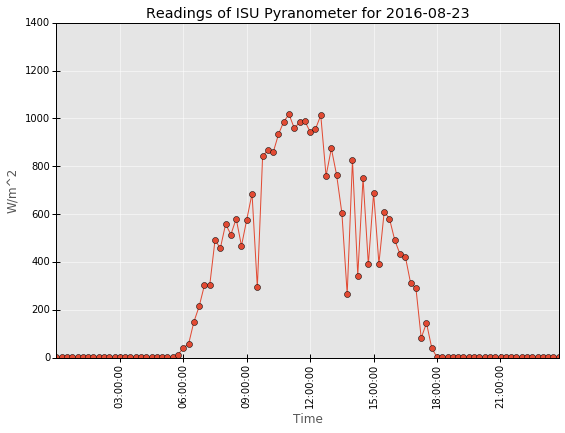

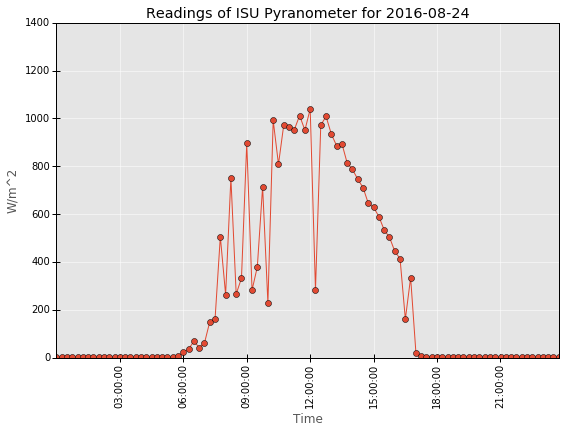

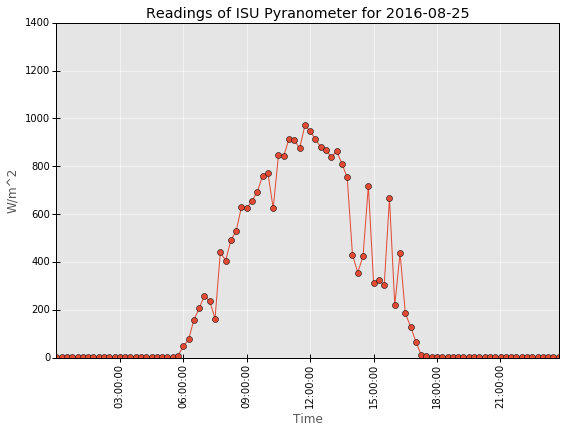

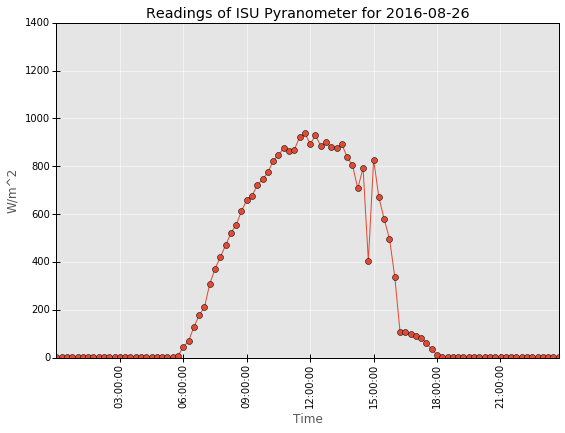

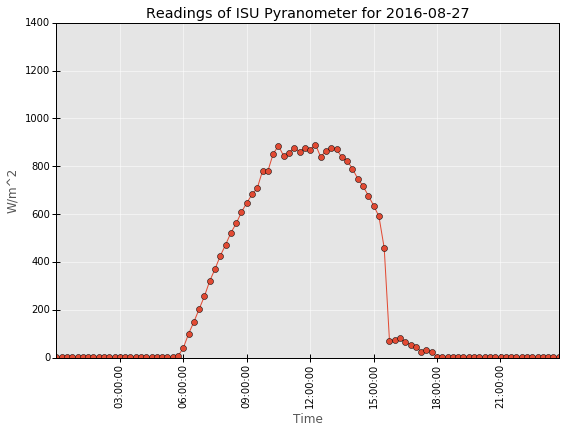

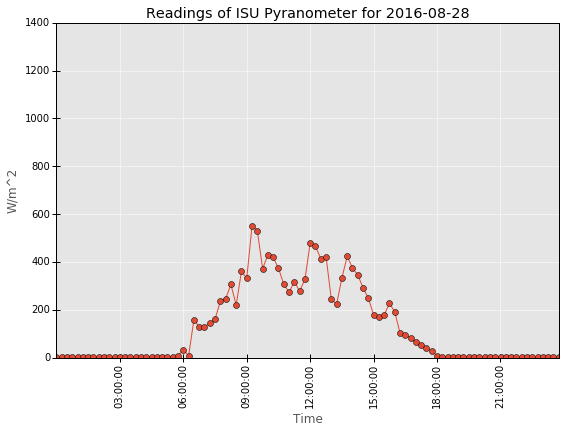

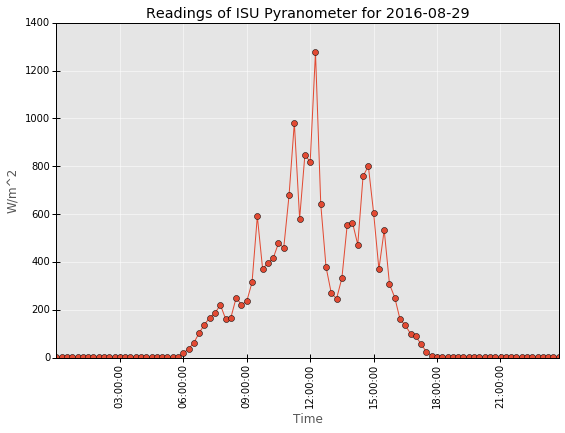

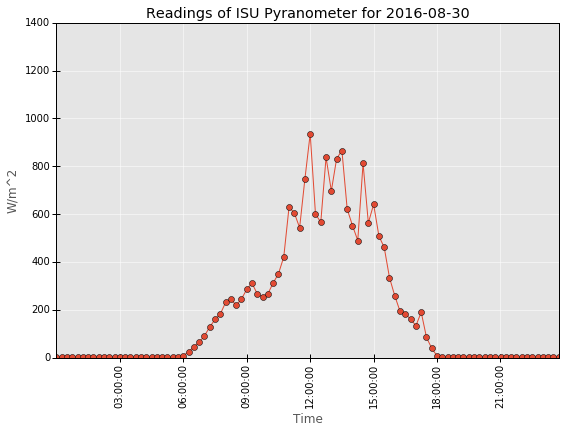

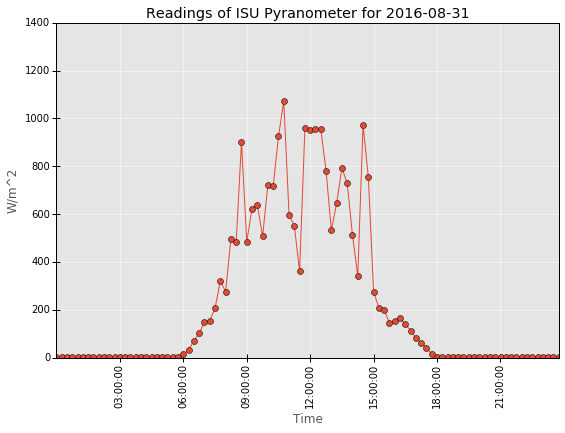

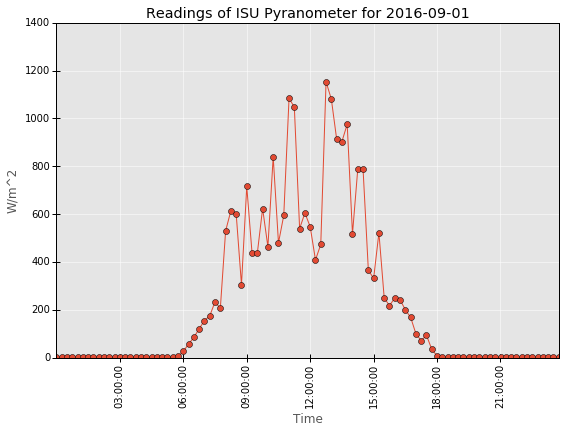

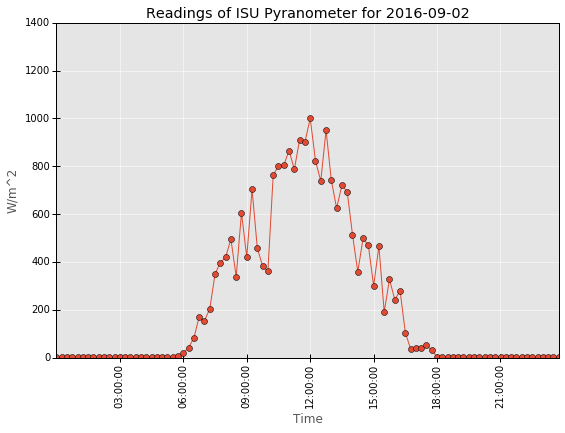

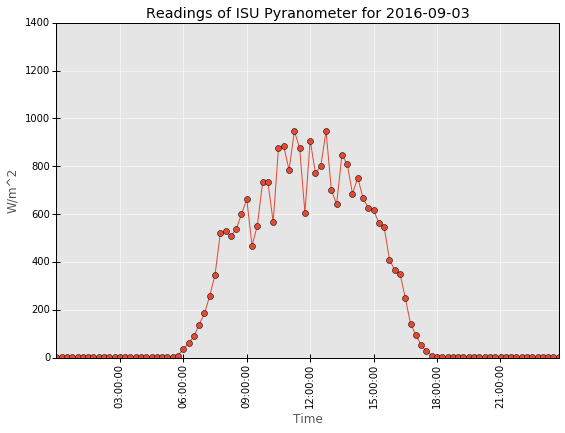

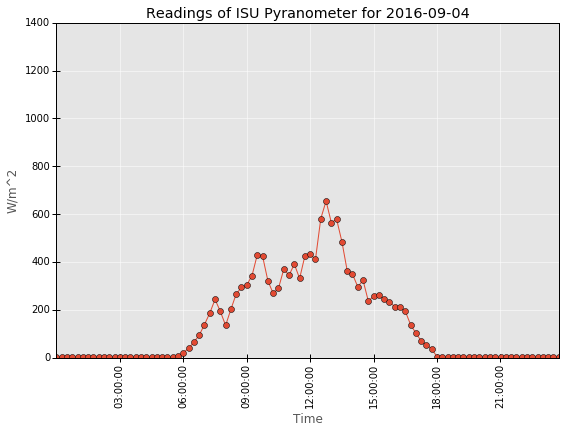

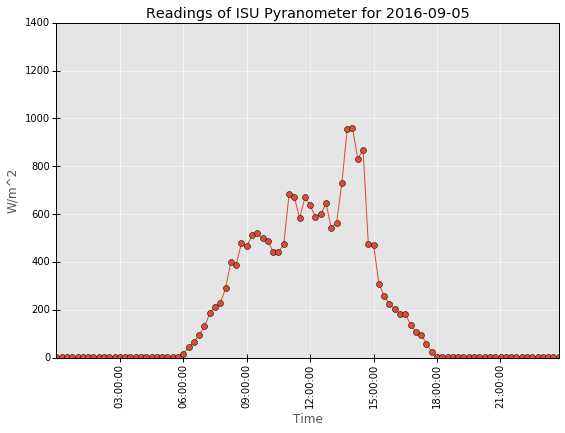

In [60]:
#all_readings_day.plot(figsize=(8,5), ylim=(0,1400));

keys03 = all_readings_day.groups.keys();
keys03.sort()

for key in keys03:
    to_plot = all_readings_day.get_group(key)
    if to_plot.count().item() < 80:
        pass
    
    else:
        fig = plt.figure(figsize=(9,6))
        ax = fig.add_subplot(1,1,1)

        ax.spines['bottom'].set_color('black')
        ax.spines['top'].set_color('black') 
        ax.spines['right'].set_color('black')
        ax.spines['left'].set_color('black')

        ax.tick_params(direction='inout', length=8, width=1, colors='black', top=False, right=False)

        ax.set_title("Readings of {} Pyranometer for {}".format(suc, str(key)[:-9]))

        ax.set_ylabel('W/m^2')
        ax.set_ylim(0,1400)
        ax.set_xlabel('Time')

        plt.xticks(rotation=90)
        #with plt.style.context('ggplot'):
        plt.plot_date(to_plot.index, to_plot, 'o-')
        plt.show()